Problem Statement


To Create a machine learning model to accurately predict how much a specific stock will be traded in a day. This is tricky due to many market factors. We'll use advanced algorithms like LSTM networks or regression models to understand the data intricacies and improve accuracy. The aim is to help make better decisions by forecasting market sentiment and potential price changes.

**About the dataset (Stock Price Prediction data)**

The dataset appears to be historical stock data for Microsoft (MSFT) and has the following columns:

Date: The timestamp indicating the day of the stock market.

Open: The opening price of the stock on that day.

High: The highest price the stock reached during the trading day.

Low: The lowest price the stock reached during the trading day.

Close: The closing price of the stock on that day.

Volume: The number of shares traded on that day.

Dividends: Dividends paid on that day.

Stock Splits: Any stock splits that occurred on that day.

It's a comprehensive dataset that includes various aspects of daily stock market activity 

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [15,6]
# to display the float values upto 6 decimal places
pd.options.display.float_format = '{:.6f}'.format
from sklearn.preprocessing import LabelEncoder,PowerTransformer

In [2]:
!pip install yfinance
import yfinance as yf


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
msft = yf.Ticker("MSFT")
msft

yfinance.Ticker object <MSFT>

In [4]:
msft.history(period="max")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054792,0.062849,0.054792,0.060163,1031788800,0.000000,0.000000
1986-03-14 00:00:00-05:00,0.060163,0.063386,0.060163,0.062311,308160000,0.000000,0.000000
1986-03-17 00:00:00-05:00,0.062311,0.063923,0.062311,0.063386,133171200,0.000000,0.000000
1986-03-18 00:00:00-05:00,0.063386,0.063923,0.061237,0.061774,67766400,0.000000,0.000000
1986-03-19 00:00:00-05:00,0.061774,0.062311,0.060163,0.060700,47894400,0.000000,0.000000
...,...,...,...,...,...,...,...
2024-04-02 00:00:00-04:00,420.109985,422.380005,417.839996,421.440002,17912000,0.000000,0.000000
2024-04-03 00:00:00-04:00,419.730011,423.260010,419.089996,420.450012,16502300,0.000000,0.000000
2024-04-04 00:00:00-04:00,424.989990,428.670013,417.570007,417.880005,19370900,0.000000,0.000000


In [5]:
df=msft.history(period="max")

In [6]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054792,0.062849,0.054792,0.060163,1031788800,0.000000,0.000000
1986-03-14 00:00:00-05:00,0.060163,0.063386,0.060163,0.062311,308160000,0.000000,0.000000
1986-03-17 00:00:00-05:00,0.062311,0.063923,0.062311,0.063386,133171200,0.000000,0.000000
1986-03-18 00:00:00-05:00,0.063386,0.063923,0.061237,0.061774,67766400,0.000000,0.000000
1986-03-19 00:00:00-05:00,0.061774,0.062311,0.060163,0.060700,47894400,0.000000,0.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9595 entries, 1986-03-13 00:00:00-05:00 to 2024-04-09 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          9595 non-null   float64
 1   High          9595 non-null   float64
 2   Low           9595 non-null   float64
 3   Close         9595 non-null   float64
 4   Volume        9595 non-null   int64  
 5   Dividends     9595 non-null   float64
 6   Stock Splits  9595 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 599.7 KB


In [8]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = pd.Timestamp.now()
start = end - pd.DateOffset(years=15)

# Downloaded historical stock data for each company
company_list = []
for stock in tech_list:
    data = yf.download(stock, start, end)
    data['Company'] = stock  # Add a column for the company name
    company_list.append(data)

# Combined the data for all companies into a single DataFrame
df = pd.concat(company_list, axis=0)

# Display the last 10 rows of the DataFrame
df.tail(10)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Company
Date,,,,,,,
2024-03-26,180.149994,180.449997,177.949997,178.300003,178.300003,29659000,AMZN
2024-03-27,179.880005,180.000000,177.309998,179.830002,179.830002,33272600,AMZN
2024-03-28,180.169998,181.699997,179.259995,180.380005,180.380005,38051600,AMZN
2024-04-01,180.789993,183.000000,179.949997,180.970001,180.970001,29174500,AMZN
2024-04-02,179.070007,180.789993,178.380005,180.690002,180.690002,32611500,AMZN
2024-04-03,179.899994,182.869995,179.800003,182.410004,182.410004,31046600,AMZN
2024-04-04,184.000000,185.100006,180.000000,180.000000,180.000000,41624300,AMZN
2024-04-05,182.380005,186.270004,181.970001,185.070007,185.070007,42335200,AMZN
2024-04-08,186.899994,187.289993,184.809998,185.190002,185.190002,39160600,AMZN


In [9]:
df['Company'].unique()

array(['AAPL', 'GOOG', 'MSFT', 'AMZN'], dtype=object)

In [10]:
df.reset_index(inplace=True)

Understanding some intricacies of EDA

In [11]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,2009-04-13,4.286071,4.320714,4.250000,4.293571,3.634936,389236400,AAPL
1,2009-04-14,4.270357,4.291786,4.187500,4.225357,3.577186,454622000,AAPL
2,2009-04-15,4.185714,4.223214,4.134286,4.201429,3.556927,412882400,AAPL
3,2009-04-16,4.256786,4.398214,4.242500,4.337500,3.672126,593446000,AAPL
4,2009-04-17,4.327857,4.437500,4.294643,4.407857,3.731690,497495600,AAPL


In [12]:
df.size

120768

In [13]:
df.shape

(15096, 8)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15096 entries, 0 to 15095
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       15096 non-null  datetime64[ns]
 1   Open       15096 non-null  float64       
 2   High       15096 non-null  float64       
 3   Low        15096 non-null  float64       
 4   Close      15096 non-null  float64       
 5   Adj Close  15096 non-null  float64       
 6   Volume     15096 non-null  int64         
 7   Company    15096 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 943.6+ KB


In [15]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,15096.000000,15096.000000,15096.000000,15096.000000,15096.000000,15096.000000
mean,72.870295,73.630912,72.102902,72.896035,71.036571,109090963.300477
std,74.604118,75.369506,73.824849,74.630452,74.328238,145863724.158261
min,3.689500,3.790500,3.655000,3.680000,3.556927,158434.000000
25%,21.320777,21.492589,21.117534,21.305667,18.829212,33466950.000000
50%,41.977499,42.320000,41.660500,42.028749,39.634727,62342000.000000
75%,107.007500,108.332623,105.481253,106.952497,104.693132,111822000.000000
max,429.829987,430.820007,427.160004,429.369995,429.369995,1880998000.000000


In [16]:
df['Company'].unique()
rename= lambda x: x.replace('AAPL','APPLE').replace('GOOG','GOOGLE').replace('MSFT','MICROSOFT').replace('AMZN','AMAZON')
df['Company']=df['Company'].apply(rename)
df['Company'].unique()

array(['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON'], dtype=object)

In [17]:
df['Daily Return']=df['Adj Close'].pct_change()

In [18]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Daily Return
0,2009-04-13,4.286071,4.320714,4.250000,4.293571,3.634936,389236400,APPLE,NaN
1,2009-04-14,4.270357,4.291786,4.187500,4.225357,3.577186,454622000,APPLE,-0.015887
2,2009-04-15,4.185714,4.223214,4.134286,4.201429,3.556927,412882400,APPLE,-0.005663
3,2009-04-16,4.256786,4.398214,4.242500,4.337500,3.672126,593446000,APPLE,0.032387
4,2009-04-17,4.327857,4.437500,4.294643,4.407857,3.731690,497495600,APPLE,0.016221


In [19]:

df['Daily Return'].fillna(0, inplace=True)


In [20]:
df[df['Daily Return']==0].shape

(48, 9)

In [21]:
df[df['Daily Return']==0]

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Daily Return
0,2009-04-13,4.286071,4.320714,4.250000,4.293571,3.634936,389236400,APPLE,0.000000
1381,2014-10-06,24.987499,25.162500,24.855000,24.905001,22.168961,148204800,APPLE,0.000000
1934,2016-12-14,28.760000,29.049999,28.745001,28.797501,26.766193,136127200,APPLE,0.000000
2192,2017-12-22,43.669998,43.855000,43.625000,43.752499,41.320259,65397600,APPLE,0.000000
2826,2020-07-02,91.962502,92.617500,90.910004,91.027496,89.019409,114041600,APPLE,0.000000
3325,2022-06-27,142.699997,143.490005,140.970001,141.660004,140.265244,70207900,APPLE,0.000000
3548,2023-05-16,171.990005,173.139999,171.800003,172.070007,171.393173,42110300,APPLE,0.000000
3892,2009-09-29,12.441616,12.447095,12.279224,12.416709,12.416709,84282733,GOOGLE,0.000000
7565,2009-05-06,20.059999,20.070000,19.610001,19.790001,14.739638,59639100,MICROSOFT,0.000000
7583,2009-06-02,21.360001,21.980000,21.200001,21.400000,16.039997,48935700,MICROSOFT,0.000000


In [22]:
df['Daily Return'].replace(0, np.nan, inplace=True)

df.isnull().sum()


Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Company          0
Daily Return    48
dtype: int64

In [23]:
cat=df.select_dtypes(exclude=np.number)
num=df.select_dtypes(include=np.number)

In [24]:
cat.head()

,Date,Company
0,2009-04-13,APPLE
1,2009-04-14,APPLE
2,2009-04-15,APPLE
3,2009-04-16,APPLE
4,2009-04-17,APPLE


In [25]:

from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
df_copy = df.copy()
df_copy['Date'] = df['Date'].astype(str)

In [26]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

knn_imputer = KNNImputer()
label_encoder = LabelEncoder()
cat1=df_copy.select_dtypes(exclude=np.number)
num1=df_copy.select_dtypes(include=np.number)
le=LabelEncoder()
for i in cat1:
    cat1[i]=le.fit_transform(cat1[i])
df_copy=pd.concat([cat1,num1],axis=1)

# Use GridSearchCV to find the best n_neighbors
grid_search = GridSearchCV(knn_imputer, param_grid, cv=5, scoring='r2')
grid_search.fit(df_copy)

# Best parameter
best_n_neighbors = grid_search.best_params_['n_neighbors']

print(f"The best number of neighbors is: {best_n_neighbors}")

The best number of neighbors is: 3


In [27]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [28]:
df_copy=df.drop('Date',axis=1)

In [29]:
cat2=df_copy.select_dtypes(exclude=np.number)
num2=df_copy.select_dtypes(include=np.number)
for i in cat2:
    cat2[i]=le.fit_transform(cat2[i])
df_copy=pd.concat([cat2,num2],axis=1)
df_copy.head()

,Company,Open,High,Low,Close,Adj Close,Volume,Daily Return,Year,Month,Day
0,1,4.286071,4.320714,4.250000,4.293571,3.634936,389236400,NaN,2009,4,13
1,1,4.270357,4.291786,4.187500,4.225357,3.577186,454622000,-0.015887,2009,4,14
2,1,4.185714,4.223214,4.134286,4.201429,3.556927,412882400,-0.005663,2009,4,15
3,1,4.256786,4.398214,4.242500,4.337500,3.672126,593446000,0.032387,2009,4,16
4,1,4.327857,4.437500,4.294643,4.407857,3.731690,497495600,0.016221,2009,4,17


In [30]:
cols=df_copy.columns

In [31]:
imputer = KNNImputer(n_neighbors=3)
df_copy = imputer.fit_transform(df_copy)
df1 = pd.DataFrame(df_copy, columns=cols)

In [32]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Daily Return,Year,Month,Day
0,2009-04-13,4.286071,4.320714,4.250000,4.293571,3.634936,389236400,APPLE,NaN,2009,4,13
1,2009-04-14,4.270357,4.291786,4.187500,4.225357,3.577186,454622000,APPLE,-0.015887,2009,4,14
2,2009-04-15,4.185714,4.223214,4.134286,4.201429,3.556927,412882400,APPLE,-0.005663,2009,4,15
3,2009-04-16,4.256786,4.398214,4.242500,4.337500,3.672126,593446000,APPLE,0.032387,2009,4,16
4,2009-04-17,4.327857,4.437500,4.294643,4.407857,3.731690,497495600,APPLE,0.016221,2009,4,17
...,...,...,...,...,...,...,...,...,...,...,...,...
15091,2024-04-03,179.899994,182.869995,179.800003,182.410004,182.410004,31046600,AMAZON,0.009519,2024,4,3
15092,2024-04-04,184.000000,185.100006,180.000000,180.000000,180.000000,41624300,AMAZON,-0.013212,2024,4,4
15093,2024-04-05,182.380005,186.270004,181.970001,185.070007,185.070007,42335200,AMAZON,0.028167,2024,4,5
15094,2024-04-08,186.899994,187.289993,184.809998,185.190002,185.190002,39160600,AMAZON,0.000648,2024,4,8


In [33]:
df1=df1.drop(['Company','Year','Month','Day'],axis=1)

In [34]:
df1['Company']=df['Company']
df1['Date']=df['Date']

In [35]:
df1

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Company,Date
0,4.286071,4.320714,4.250000,4.293571,3.634936,389236400.000000,-0.003423,APPLE,2009-04-13
1,4.270357,4.291786,4.187500,4.225357,3.577186,454622000.000000,-0.015887,APPLE,2009-04-14
2,4.185714,4.223214,4.134286,4.201429,3.556927,412882400.000000,-0.005663,APPLE,2009-04-15
3,4.256786,4.398214,4.242500,4.337500,3.672126,593446000.000000,0.032387,APPLE,2009-04-16
4,4.327857,4.437500,4.294643,4.407857,3.731690,497495600.000000,0.016221,APPLE,2009-04-17
...,...,...,...,...,...,...,...,...,...
15091,179.899994,182.869995,179.800003,182.410004,182.410004,31046600.000000,0.009519,AMAZON,2024-04-03
15092,184.000000,185.100006,180.000000,180.000000,180.000000,41624300.000000,-0.013212,AMAZON,2024-04-04
15093,182.380005,186.270004,181.970001,185.070007,185.070007,42335200.000000,0.028167,AMAZON,2024-04-05
15094,186.899994,187.289993,184.809998,185.190002,185.190002,39160600.000000,0.000648,AMAZON,2024-04-08


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15096 entries, 0 to 15095
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Open          15096 non-null  float64       
 1   High          15096 non-null  float64       
 2   Low           15096 non-null  float64       
 3   Close         15096 non-null  float64       
 4   Adj Close     15096 non-null  float64       
 5   Volume        15096 non-null  float64       
 6   Daily Return  15096 non-null  float64       
 7   Company       15096 non-null  object        
 8   Date          15096 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 1.0+ MB


In [37]:
df1.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Daily Return    0
Company         0
Date            0
dtype: int64

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15096 entries, 0 to 15095
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Open          15096 non-null  float64       
 1   High          15096 non-null  float64       
 2   Low           15096 non-null  float64       
 3   Close         15096 non-null  float64       
 4   Adj Close     15096 non-null  float64       
 5   Volume        15096 non-null  float64       
 6   Daily Return  15096 non-null  float64       
 7   Company       15096 non-null  object        
 8   Date          15096 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 1.0+ MB


<AxesSubplot:>

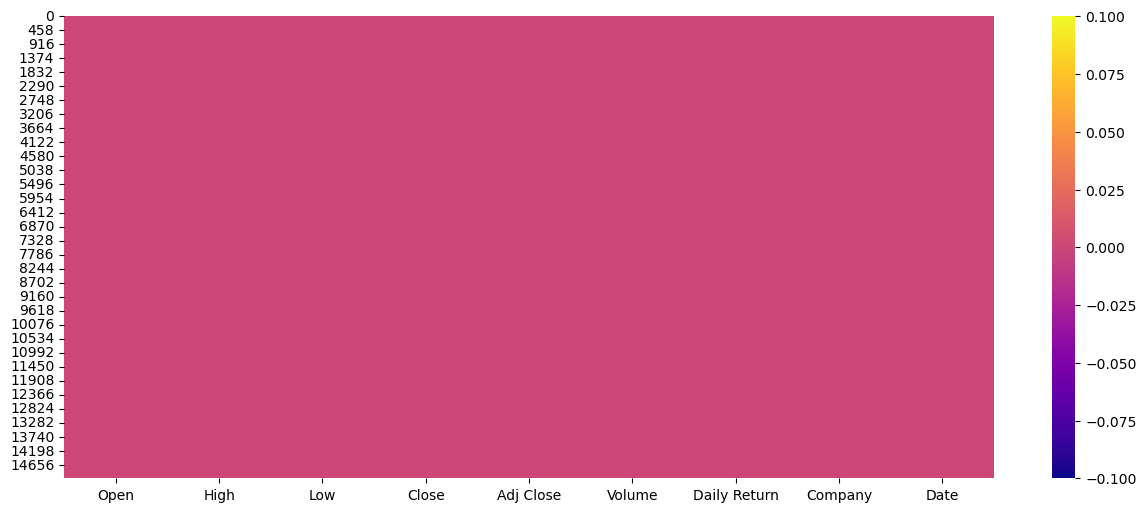

In [39]:
sns.heatmap(df1.isnull(),cmap='plasma')

In [40]:
cat=df1.select_dtypes(exclude=np.number)
num=df1.select_dtypes(include=np.number)

In [41]:
cat.head()

,Company,Date
0,APPLE,2009-04-13
1,APPLE,2009-04-14
2,APPLE,2009-04-15
3,APPLE,2009-04-16
4,APPLE,2009-04-17


Inference

There are only 2 categorical columns Date and the  name of the Company 

In [42]:
num.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
0,4.286071,4.320714,4.250000,4.293571,3.634936,389236400.000000,-0.003423
1,4.270357,4.291786,4.187500,4.225357,3.577186,454622000.000000,-0.015887
2,4.185714,4.223214,4.134286,4.201429,3.556927,412882400.000000,-0.005663
3,4.256786,4.398214,4.242500,4.337500,3.672126,593446000.000000,0.032387
4,4.327857,4.437500,4.294643,4.407857,3.731690,497495600.000000,0.016221


Inference

There is only one Discrete numerical variable which is Volums of the Stock rest of them are Continuous

Univariate Anaysis (Numerical)

In [43]:
cols=list(df1.select_dtypes(include=np.number).columns)
cols

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily Return']

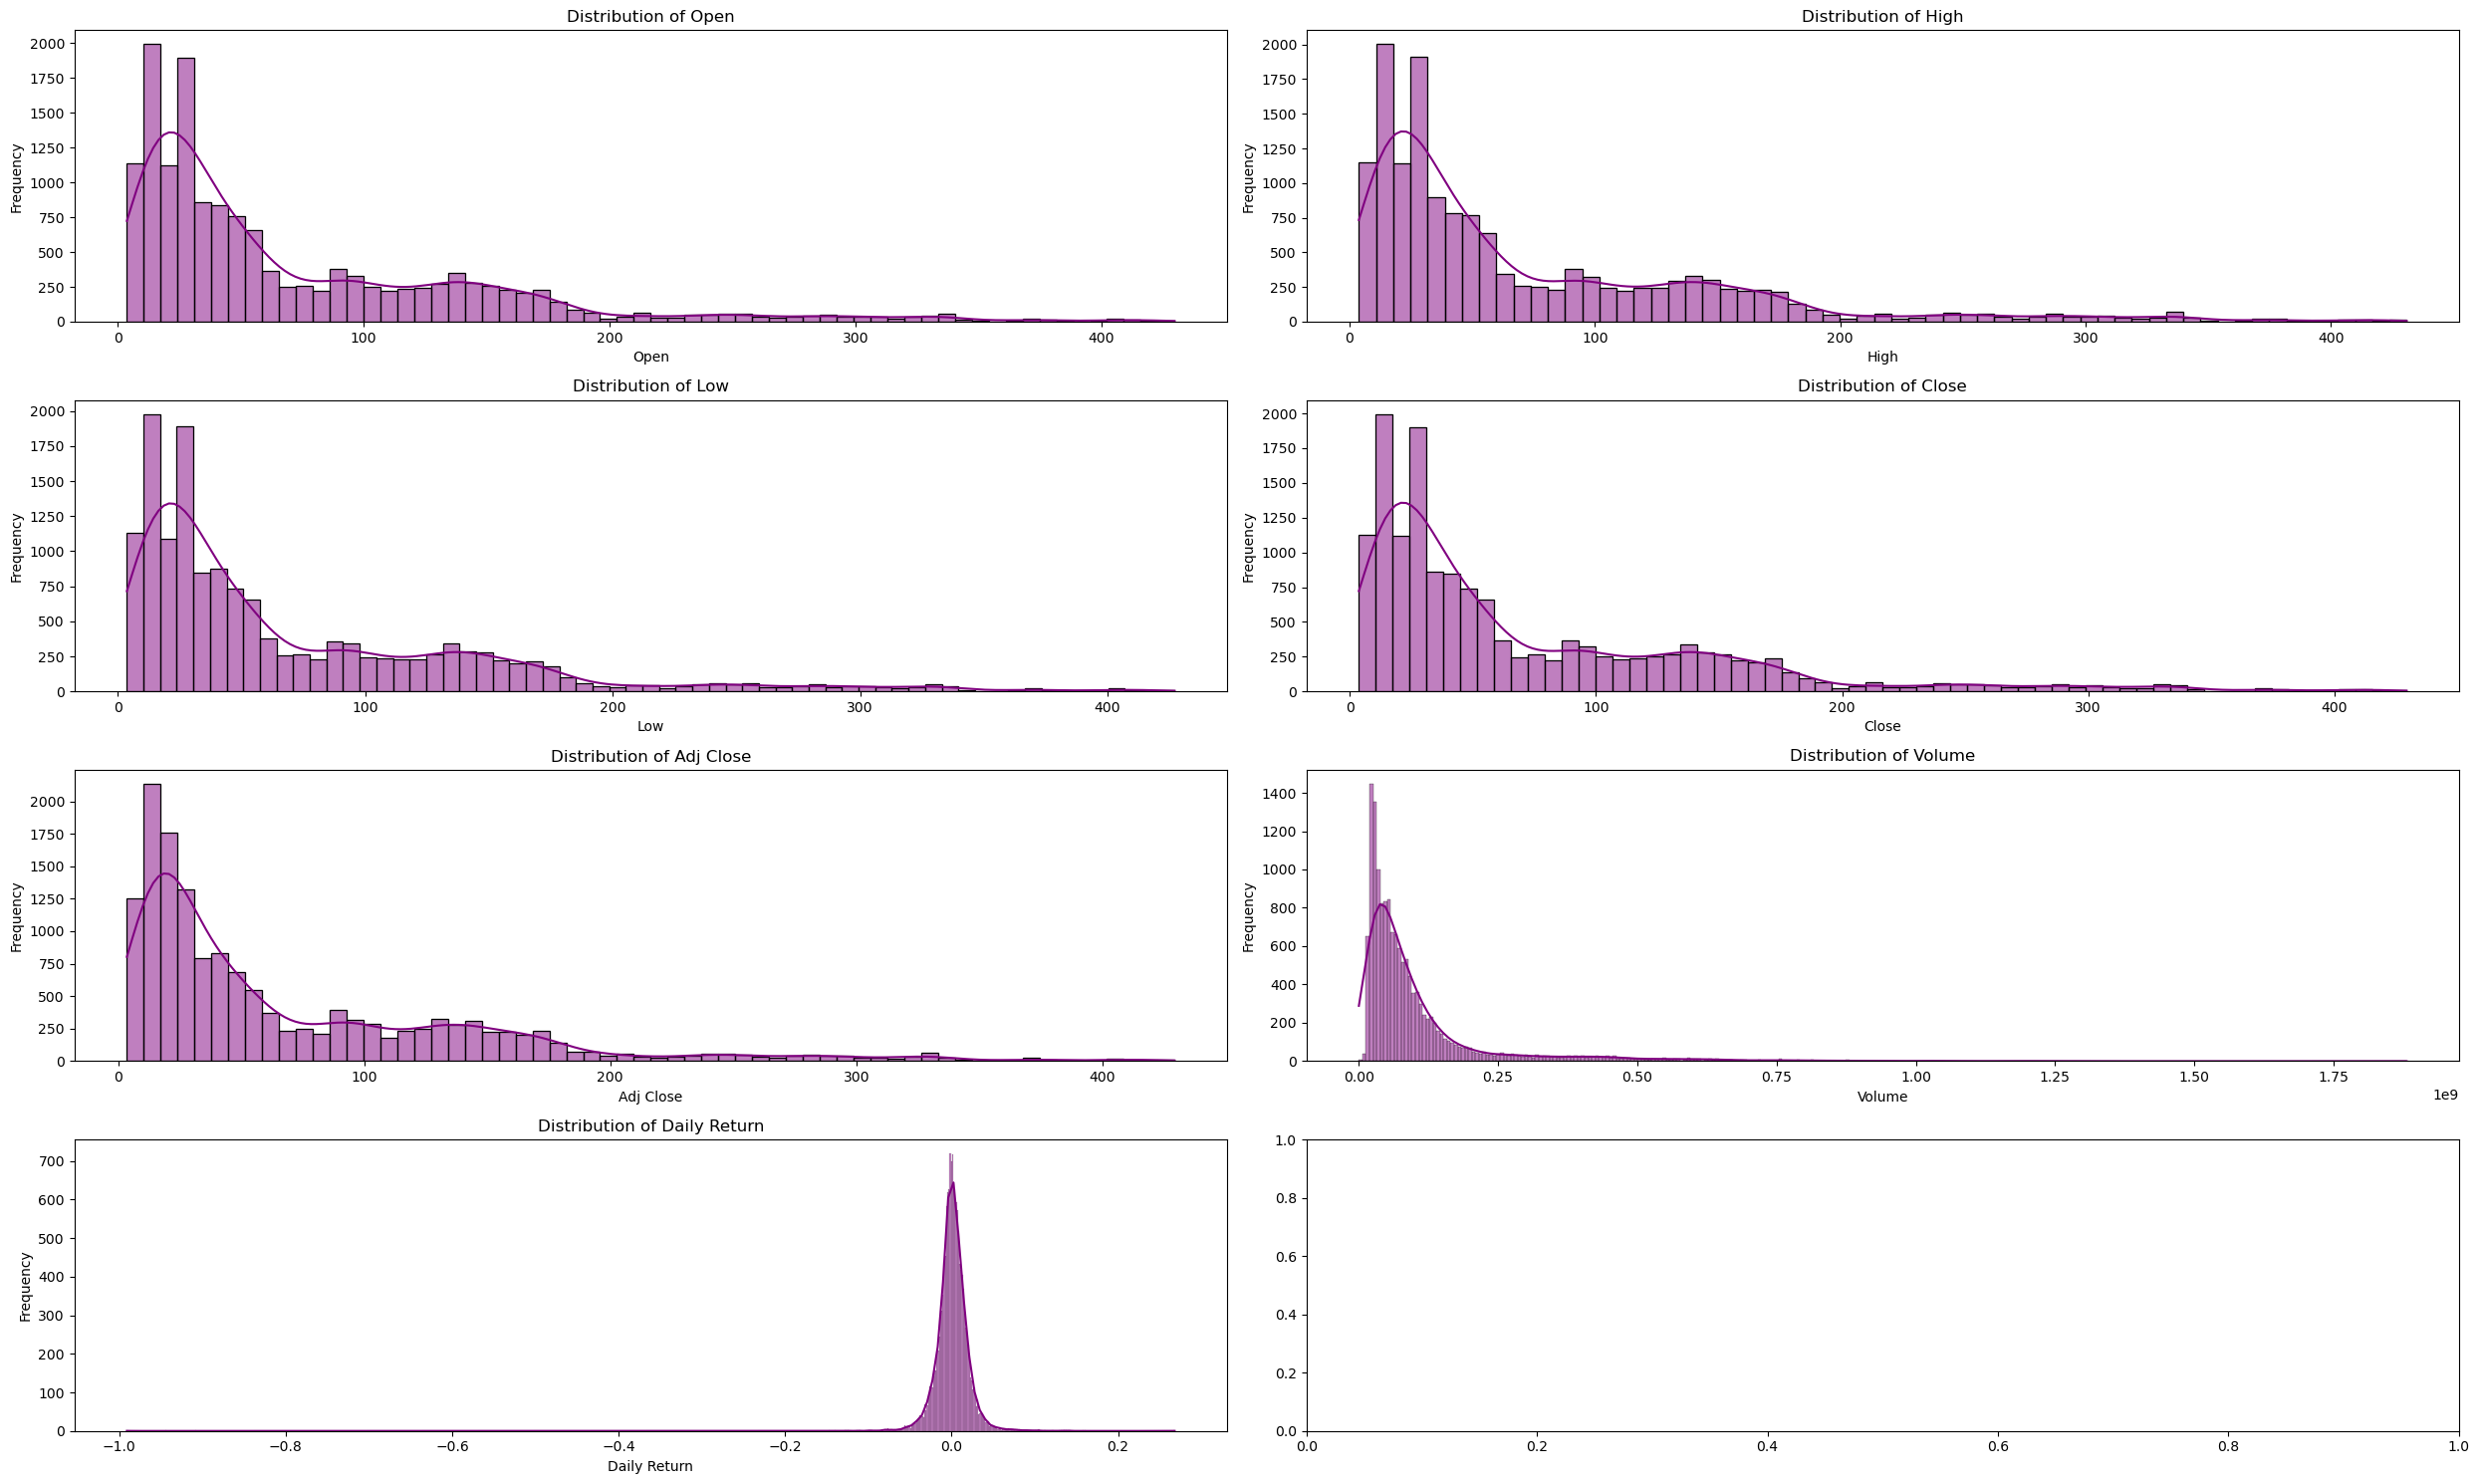

In [44]:

num_rows = 4
num_cols = 2

fig, ax = plt.subplots(num_rows, num_cols, figsize=(25, 15))

axes = ax.flatten()

# Loop through numerical columns and corresponding subplots
for i, col in enumerate(cols):
    if i < len(axes):  # Check if there are enough subplots for all columns
        # Plot distribution using seaborn's histplot
        sns.histplot(df1[col], ax=axes[i], kde=True, color='purple')
        
        # Set title for subplot
        axes[i].set_title(f'Distribution of {col}')
        
        # Optionally, set other properties like labels, etc.
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')


plt.tight_layout()
plt.show()


Inferences

All the variables are skewed towards Right also known as Positively skewed distribution

The mode (most frequent value) will be less than the median, the mean (average) is greater than the median and the median is closer to the left side of the data in all the Numerical Variables.

A right-skewed distribution might suggest that volatility is generally lower, but there is a chance of sudden increases in volatility. Traders and investors may adjust their strategies accordingly, considering the potential for occasional larger price swings.
Investors should be aware of the high level of negative skewness on Daily Return, as it suggests a higher risk of experiencing large losses relative to gains on a daily basis.

Univariate Anaysis (Categorical)

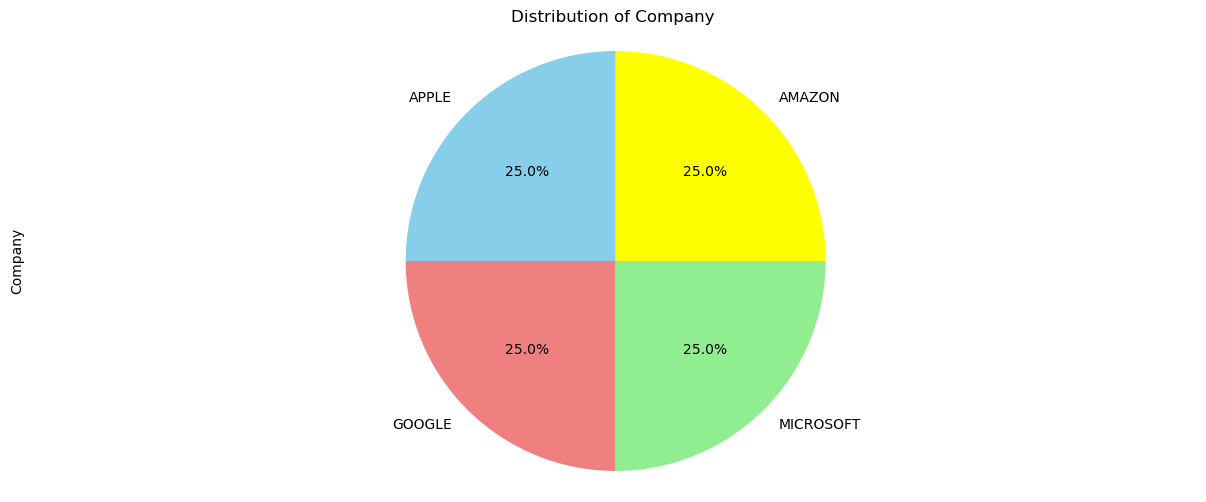

In [45]:

df1['Company'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen','yellow'])
plt.title('Distribution of Company ')
plt.axis('equal') 
plt.show()


Inference

AlIf the stocks of Apple, Amazon, Google, and Microsoft are equally distributed, each accounting for 25% of the entire stock dataset, it implies a balanced representation of these companies in the dataset. 

Bivariate Analysis (Numerical vs Numerical[Target])

In [46]:
cols=df1.columns

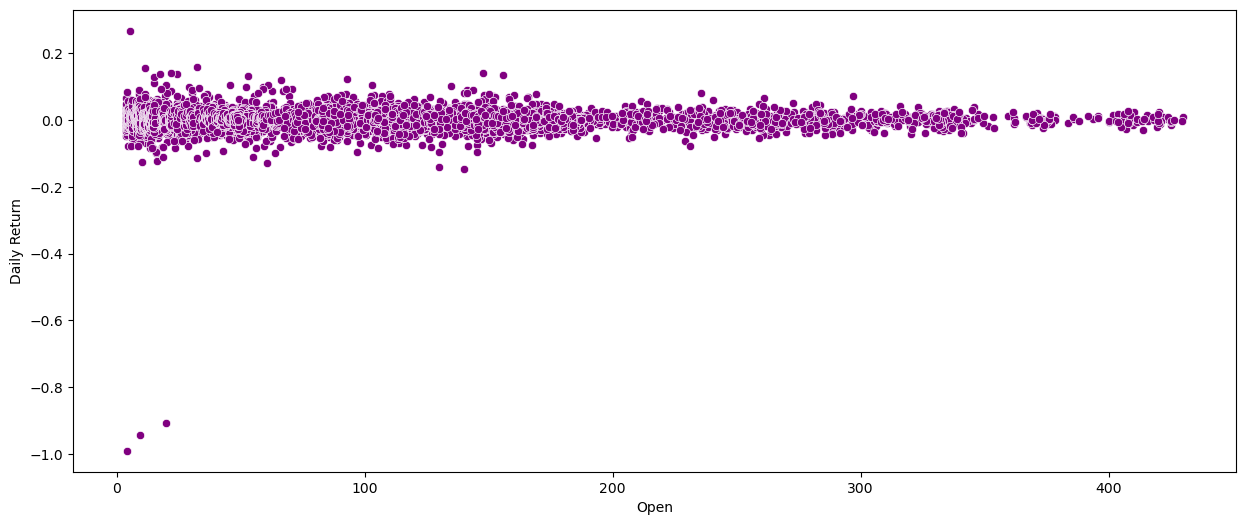

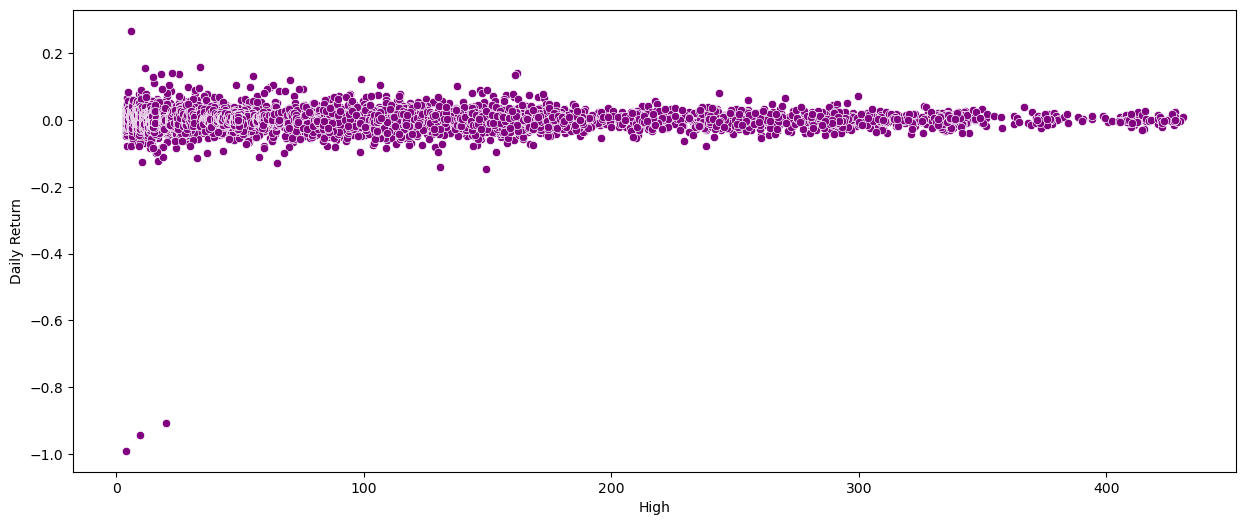

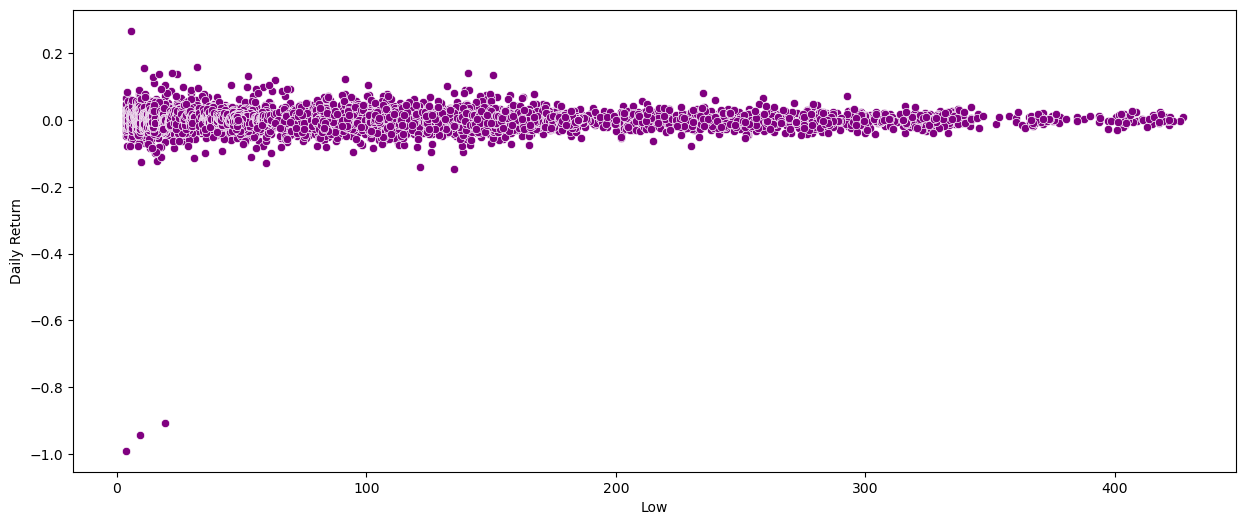

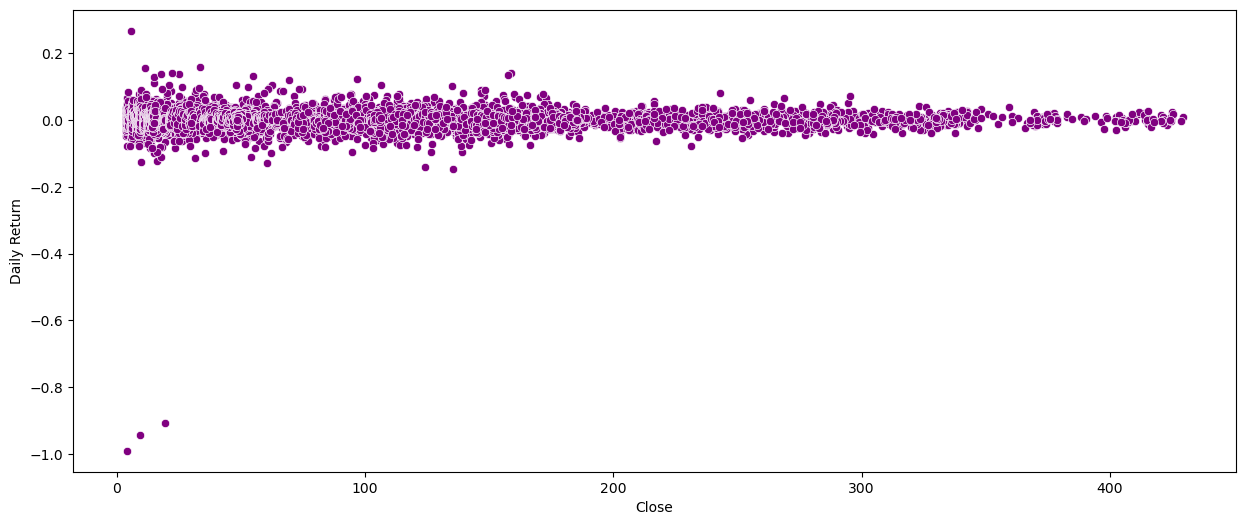

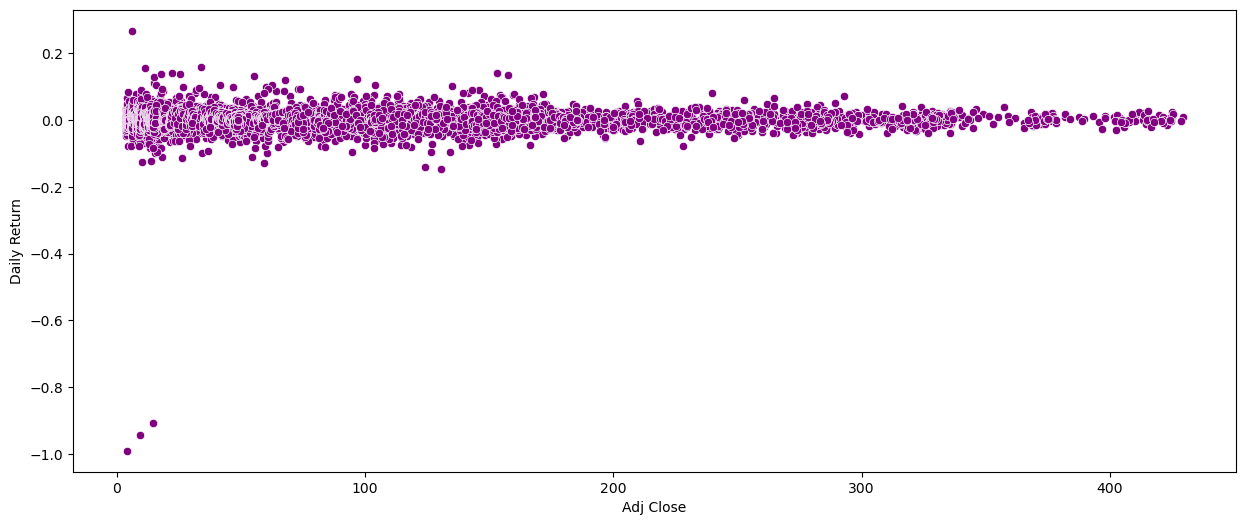

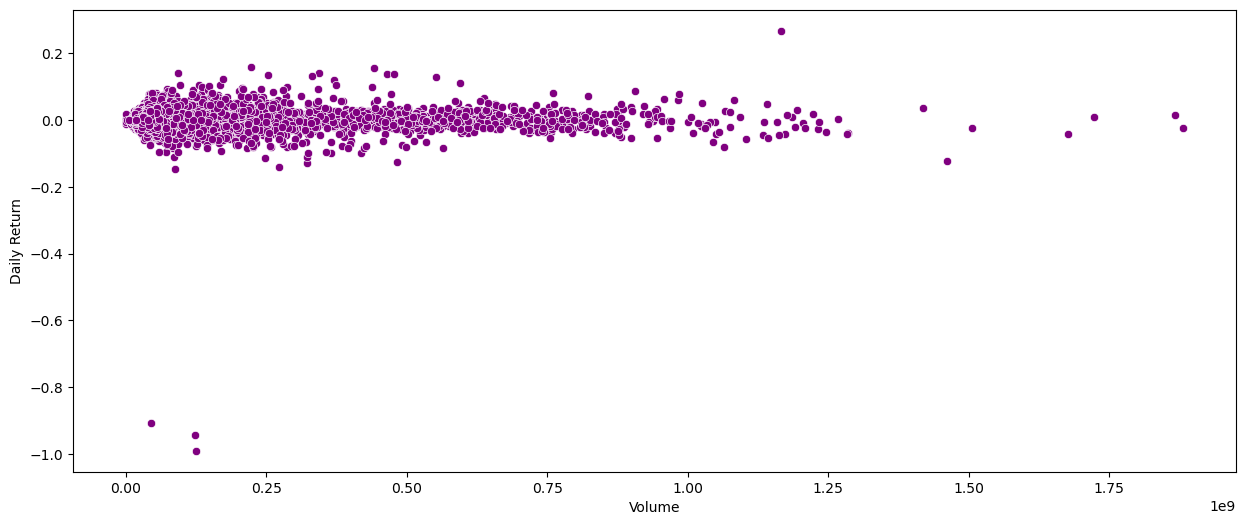

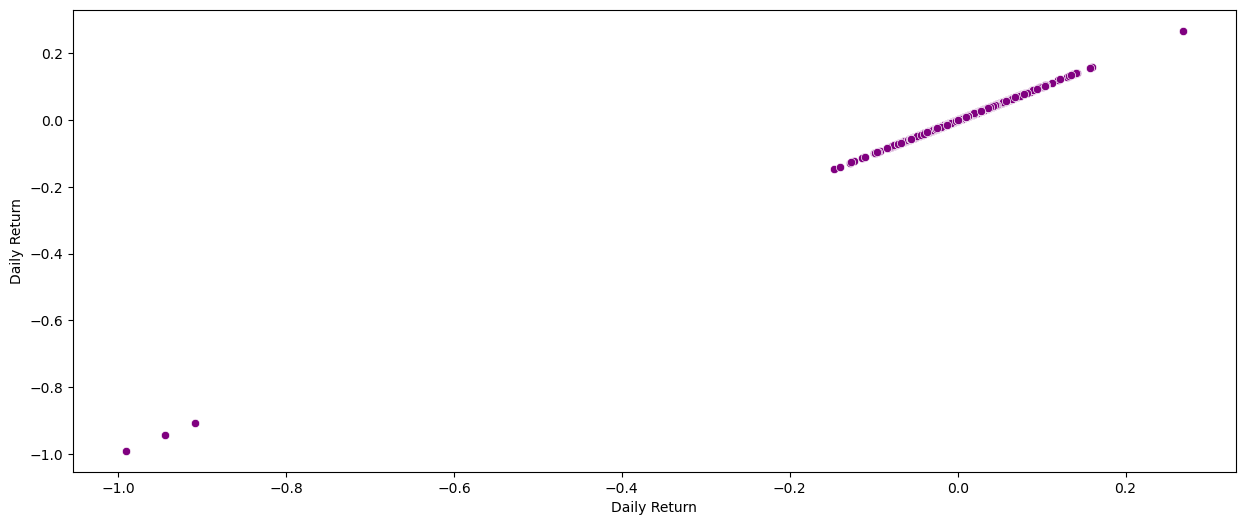

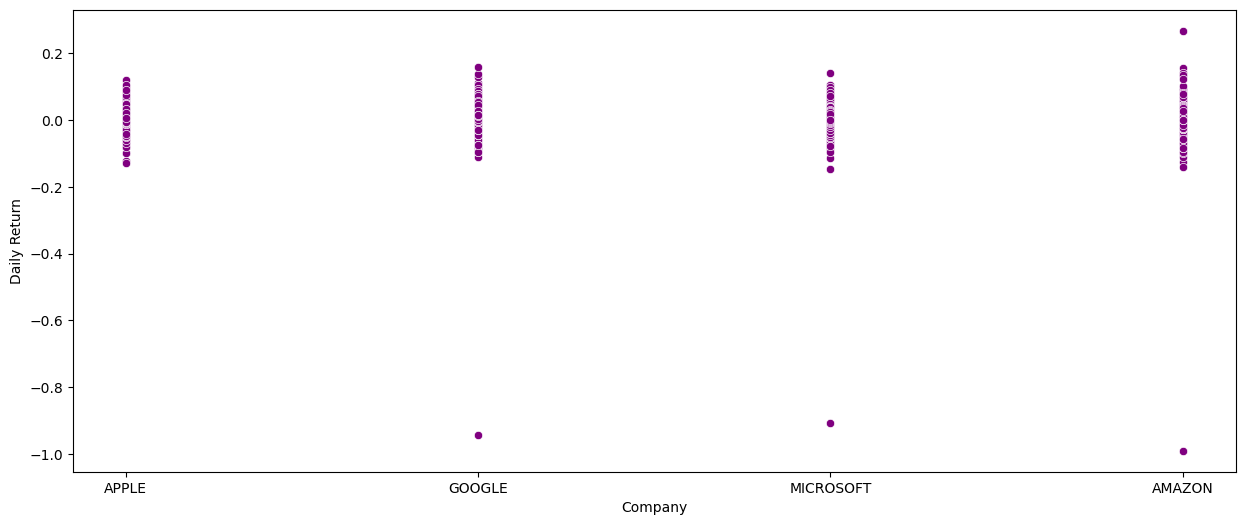

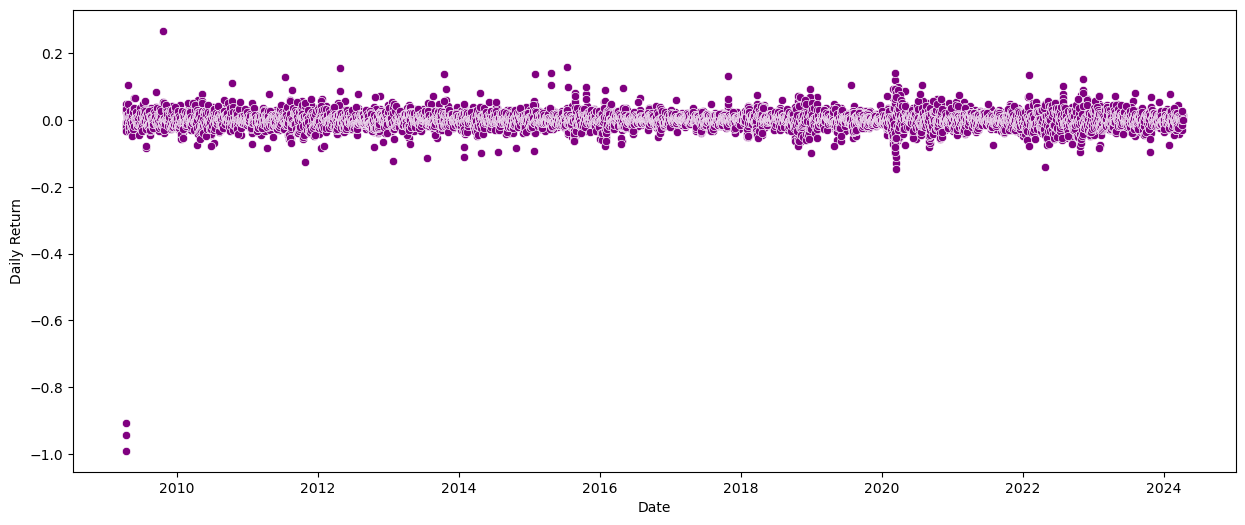

In [47]:

for i in cols:
    sns.scatterplot(x=df1[i], y=df['Daily Return'], color='purple')
    plt.xlabel(i)
    plt.ylabel('Daily Return')
    plt.show()


Inferences

There may be low or no linear correlation between Daily Return and the other variables.

A flat line suggests no association between the predictor variable(s) and the target variable[Daily Return]. In this case, the predictor variable(s) do not provide any information about the target variable[Daily Return].

Bivariate Analysis ( Categorical vs Numerical[Daily Return])

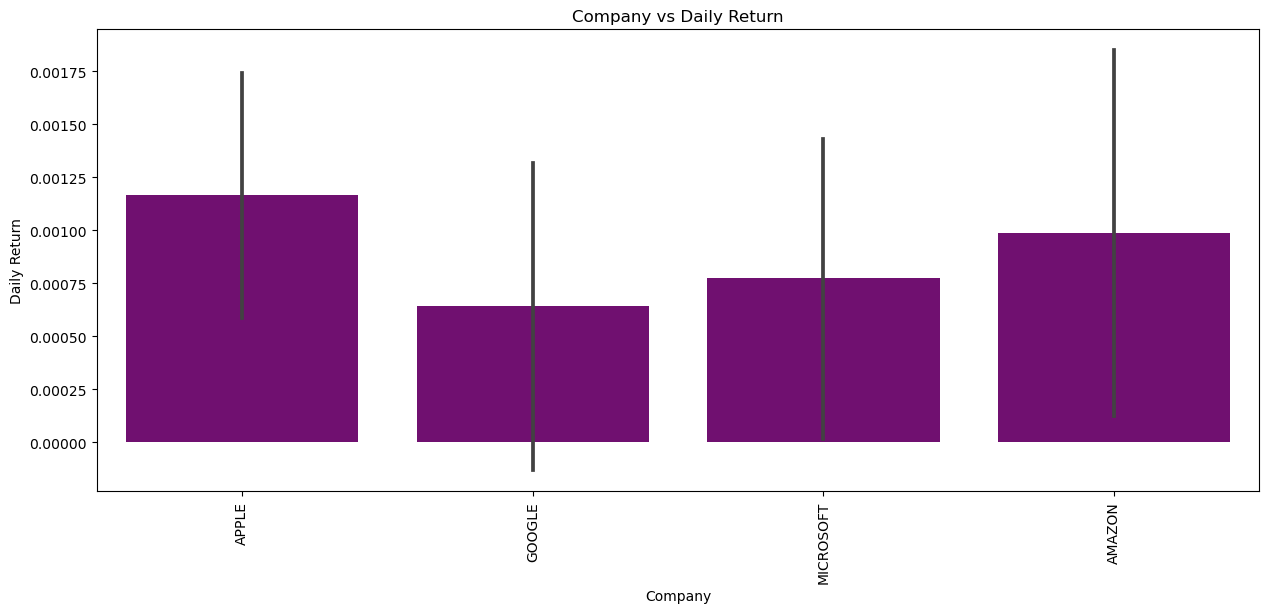

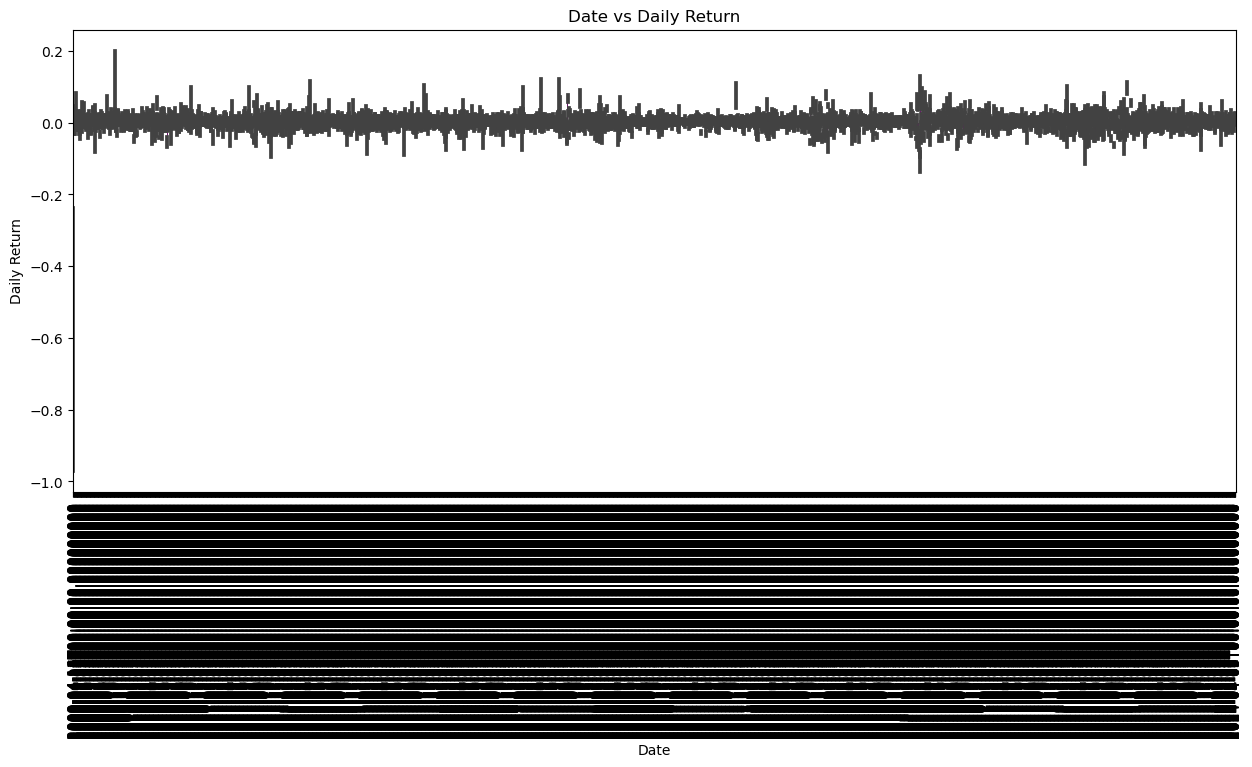

In [48]:
for category, data in cat.items():
    sns.barplot(x=category, y='Daily Return', data=df1, color='purple')
    plt.title(f'{category} vs Daily Return')
    plt.xlabel(category)
    plt.ylabel('Daily Return')
    plt.xticks(rotation=90)
    plt.show()

Inference

Based on the Daily returns AAPL[Apple Stocks] is the highest comapared to rest of all other stocks

AMZN[Amazon stocks] Daily Returns is the seacond highest of all

MSFT[Microsoft Stocks ] has invested in large volume but comapratively less based on Amazon Stocks 

In [49]:
df1['Company'].unique()

array(['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON'], dtype=object)

In [50]:
APPLE=df1[df1['Company']=='APPLE']
AMAZON=df1[df1['Company']=='AMAZON']
MICROSOFT=df1[df1['Company']=='MICROSOFT']
GOOGLE=df1[df1['Company']=='GOOGLE']

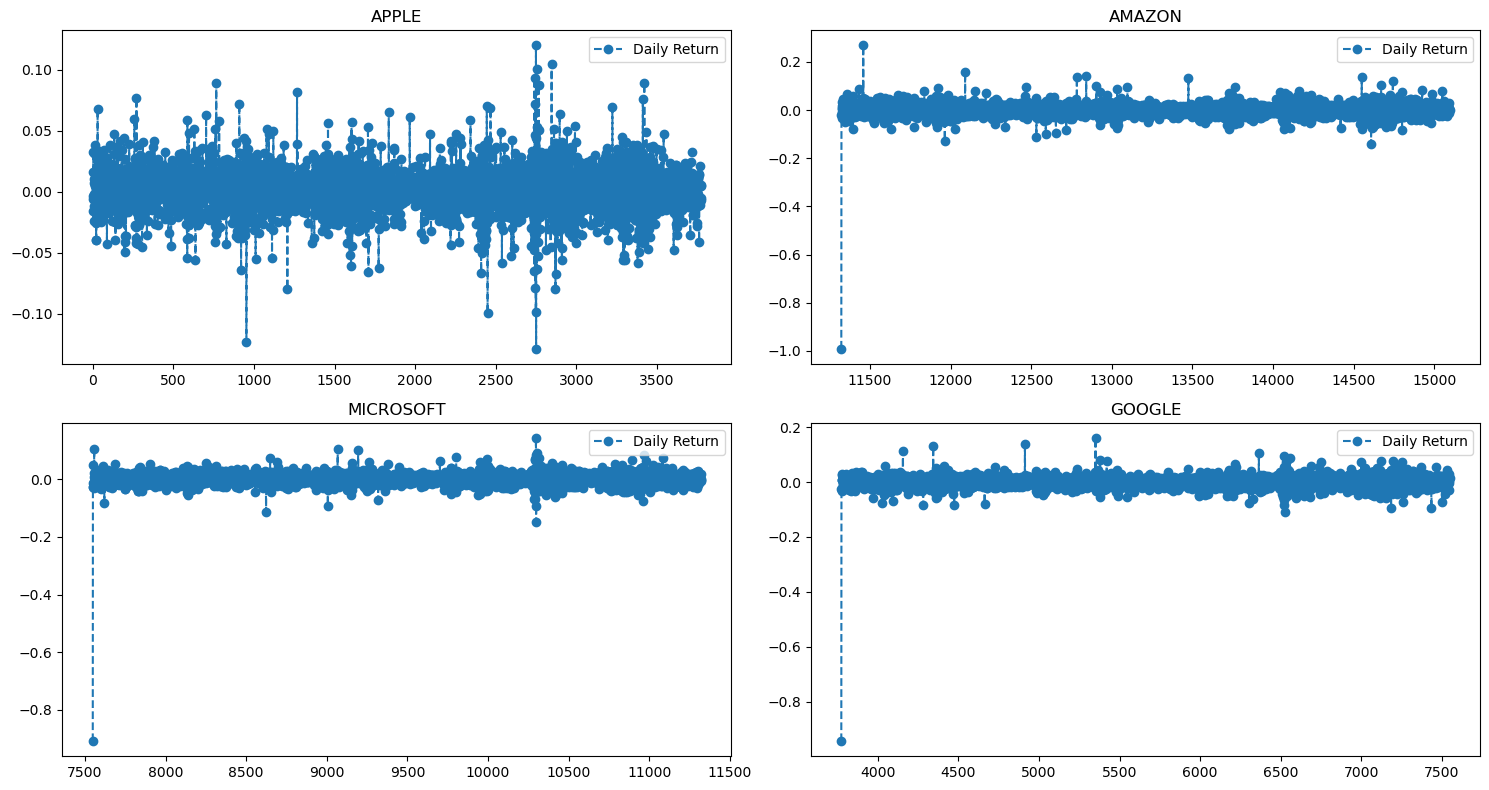

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

APPLE['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

AMAZON['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('AMAZON')

MICROSOFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

GOOGLE['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('GOOGLE')

fig.tight_layout()

Inference:
    
    The daily return on stock fluctuates throughout the time period for all four companies.

    Over the time period Apple’s stock price generally trended higher compared to the other three companies
    
    While Microsoft's line might be consistently below the others, it doesn't necessarily mean their stock price is always the lowest.

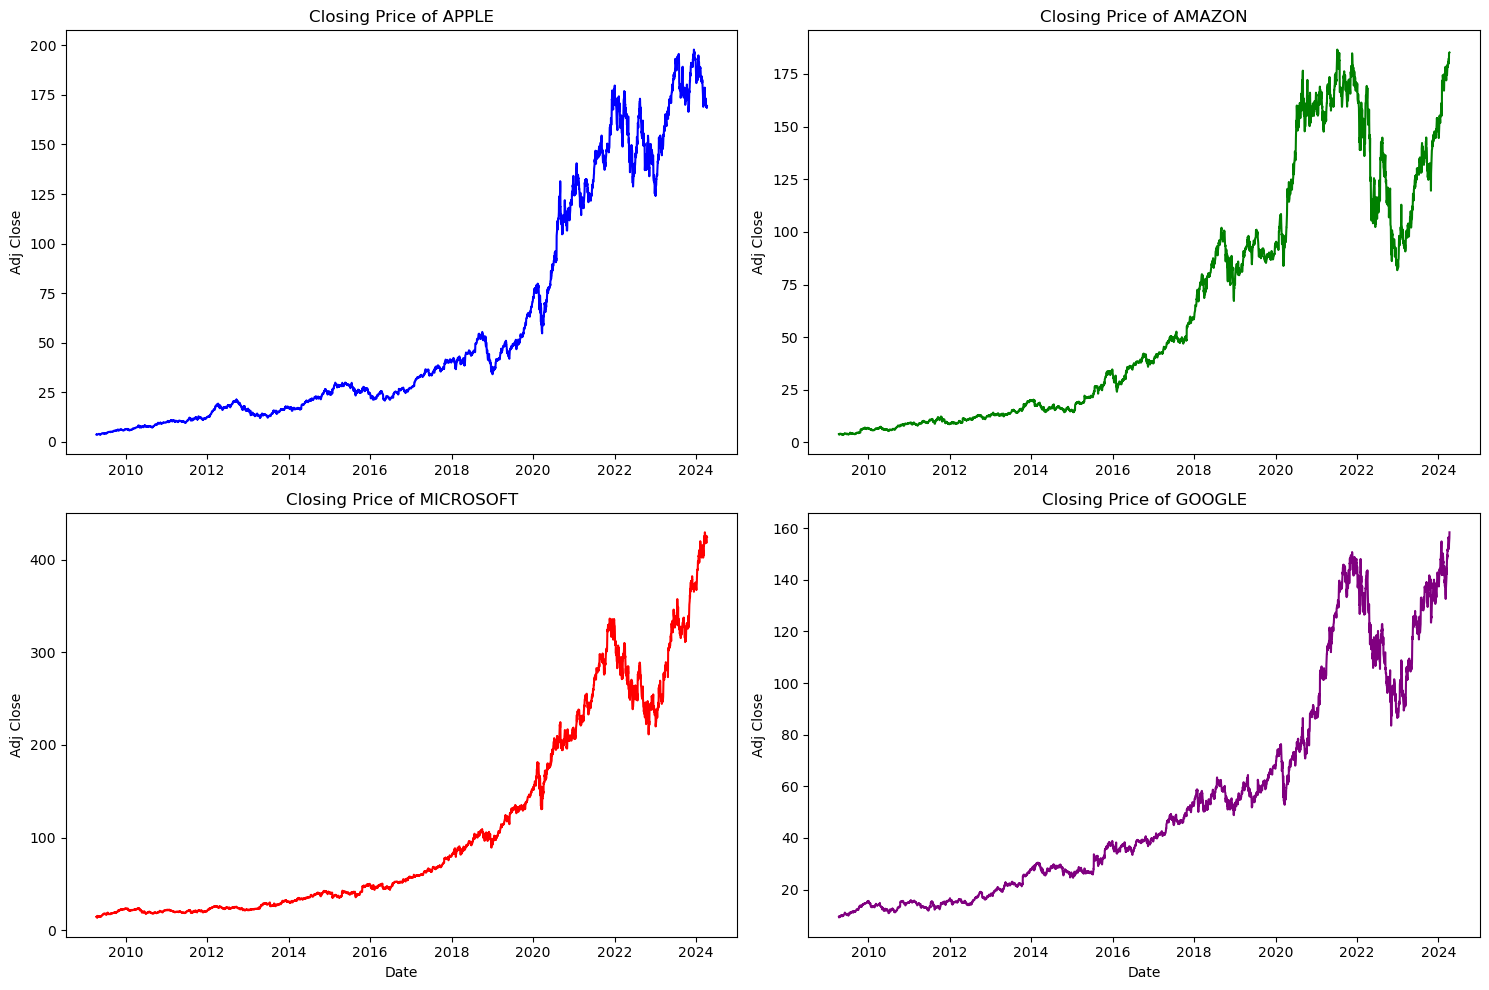

In [52]:
# Plotting the closing prices of the four companies
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plotting Apple
axes[0, 0].plot(APPLE['Date'], APPLE['Adj Close'], color='blue')
axes[0, 0].set_title('Closing Price of APPLE')
axes[0, 0].set_xlabel(None)
axes[0, 0].set_ylabel('Adj Close')

# Plotting Amazon
axes[0, 1].plot(AMAZON['Date'], AMAZON['Adj Close'], color='green')
axes[0, 1].set_title('Closing Price of AMAZON')
axes[0, 1].set_xlabel(None)
axes[0, 1].set_ylabel('Adj Close')

# Plotting Microsoft
axes[1, 0].plot(MICROSOFT['Date'], MICROSOFT['Adj Close'], color='red')
axes[1, 0].set_title('Closing Price of MICROSOFT')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Adj Close')

# Plotting Google
axes[1, 1].plot(GOOGLE['Date'], GOOGLE['Adj Close'], color='purple')
axes[1, 1].set_title('Closing Price of GOOGLE')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Adj Close')

plt.tight_layout()
plt.show()


Inference:
    
     Investors may have shown confidence in the company's future prospects, leading to an increase in the adjusted closing price of the stock compared to the year 2010 to 2024
     
     The upward trend in the adjusted closing price could reflect positive investor sentiment
     
     Positive sentiment can drive demand for the stock, leading to price appreciation even in the absence of immediate earnings or revenue growth.

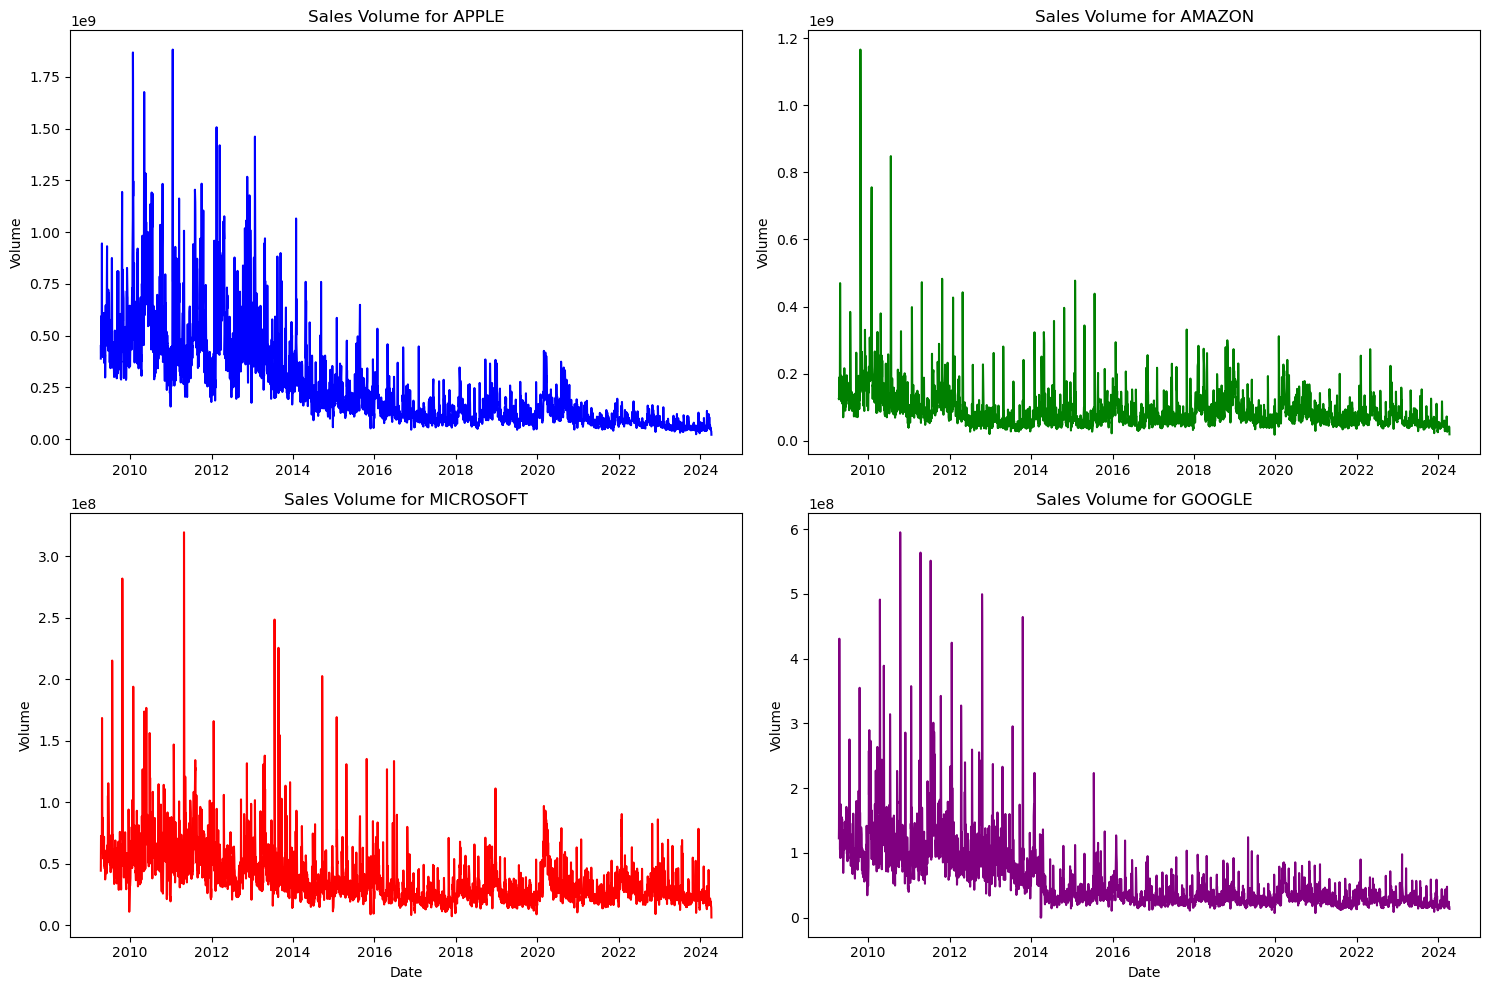

In [53]:
# Plotting the total volume of stock traded each day for the four companies
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plotting for Apple
axes[0, 0].plot(APPLE['Date'], APPLE['Volume'], color='blue')
axes[0, 0].set_title('Sales Volume for APPLE')
axes[0, 0].set_xlabel(None)
axes[0, 0].set_ylabel('Volume')

# Plotting for Amazon
axes[0, 1].plot(AMAZON['Date'], AMAZON['Volume'], color='green')
axes[0, 1].set_title('Sales Volume for AMAZON')
axes[0, 1].set_xlabel(None)
axes[0, 1].set_ylabel('Volume')

# Plotting for Microsoft
axes[1, 0].plot(MICROSOFT['Date'], MICROSOFT['Volume'], color='red')
axes[1, 0].set_title('Sales Volume for MICROSOFT')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Volume')

# Plotting for Google
axes[1, 1].plot(GOOGLE['Date'], GOOGLE['Volume'], color='purple')
axes[1, 1].set_title('Sales Volume for GOOGLE')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Volume')

plt.tight_layout()
plt.show()


Conclusion:
    
    For all the companies The sales volume started at a high level in 2010 but experienced a consistent decrease from 2014 comapred to 2010
    
    The trend of declining sales volume persisted into 2024, indicating ongoing challenges for the companies.
    
     To reverse the declining trend, the company may need to focus on innovation, adaptability, and agility
    

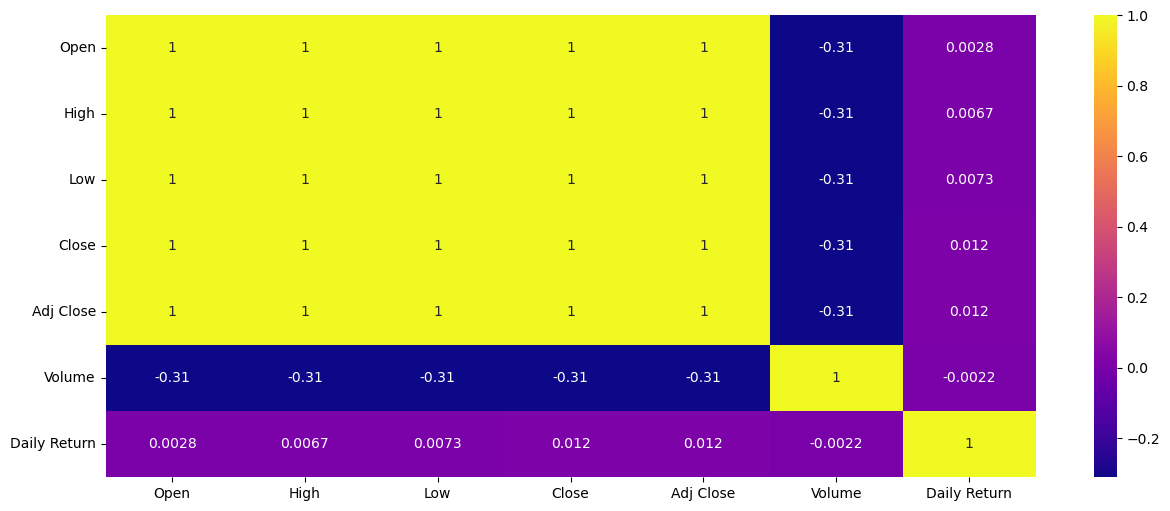

In [54]:
sns.heatmap(df1.corr(),annot=True,cmap="plasma")
plt.show()

Inference:

    All the Independent Variables are strongly correlated with each other 

    There is  presence of Multicollinearity in this Data

    There is very less correlation bitween the Dependent  and the Independent Variable 

Analysis of Target Variable of Target Variable

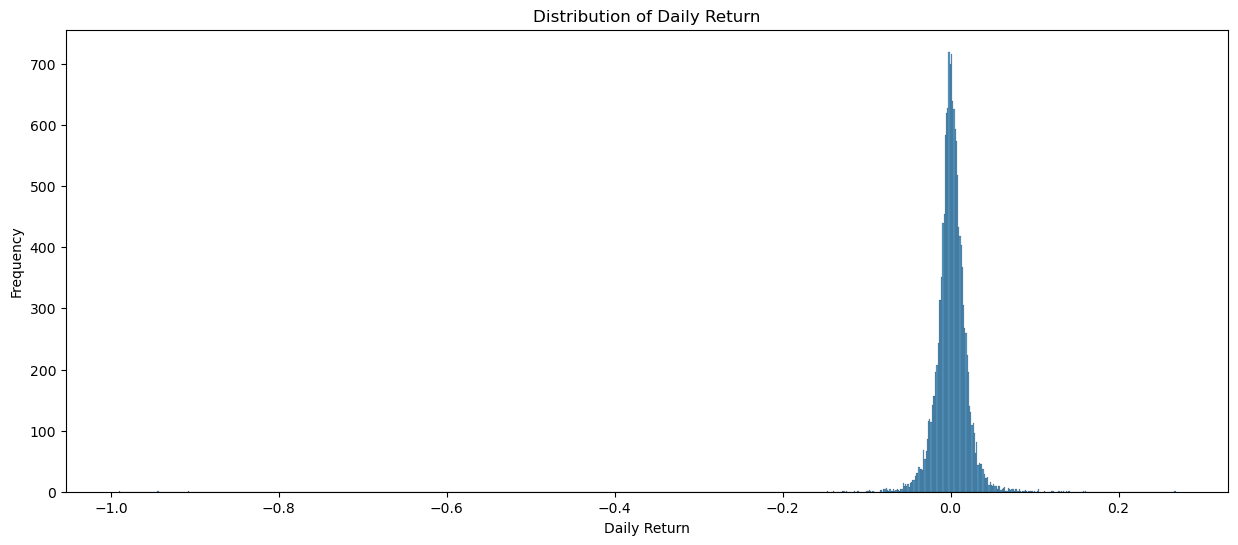

In [55]:
sns.histplot(df1['Daily Return'])
plt.title('Distribution of Daily Return')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

Conclusion:

    The Target Variable is noty evenly distributed
    
    This uneven distribution has important implications for risk management, portfolio construction, trading strategies, and option pricing in the stock market

Outliers

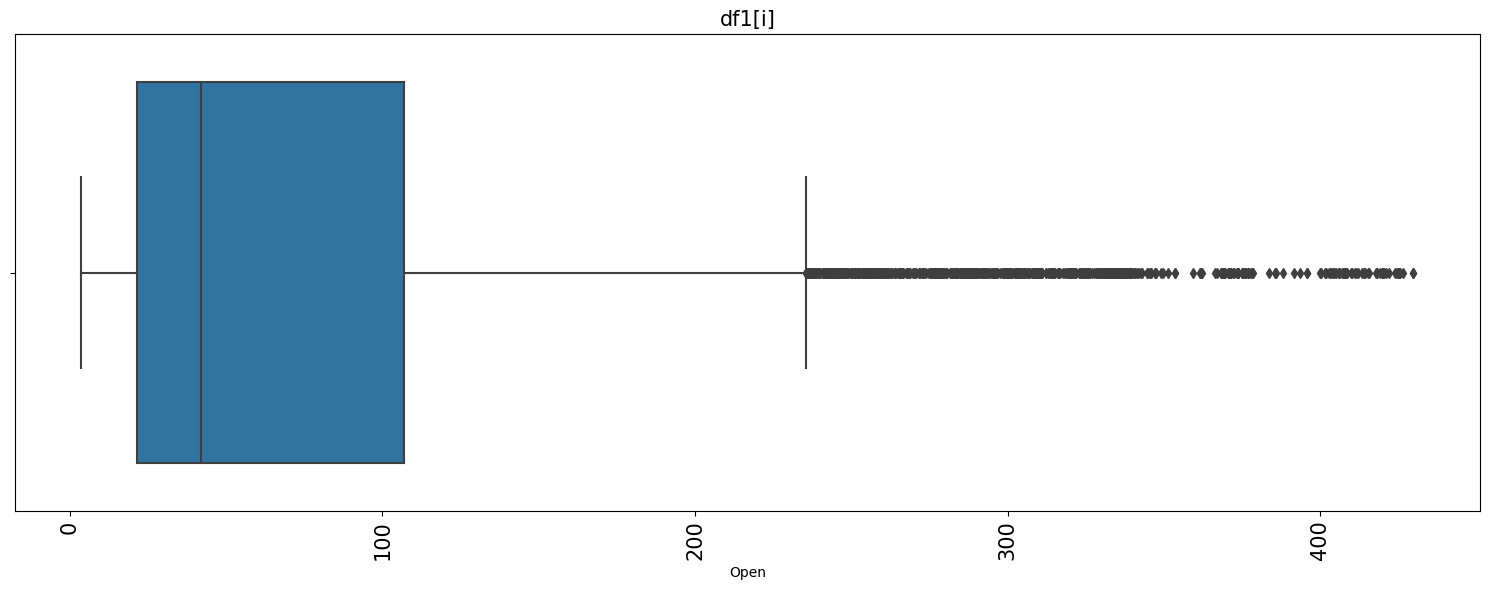

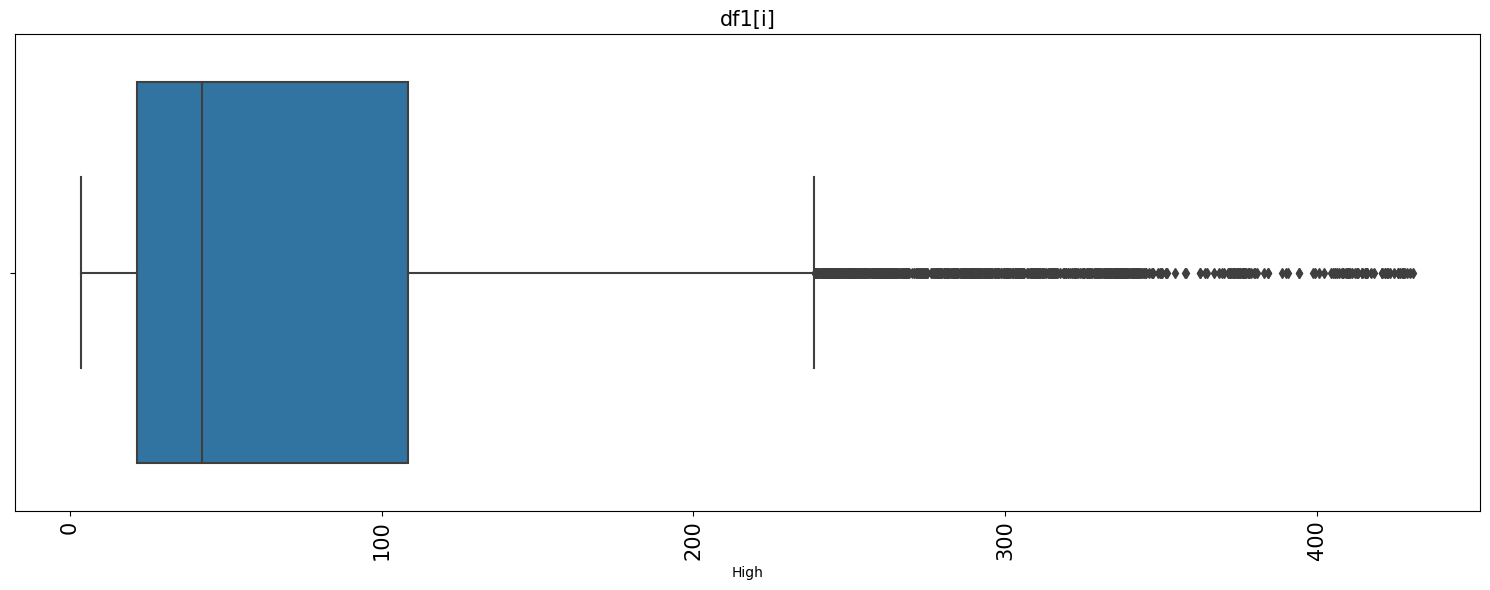

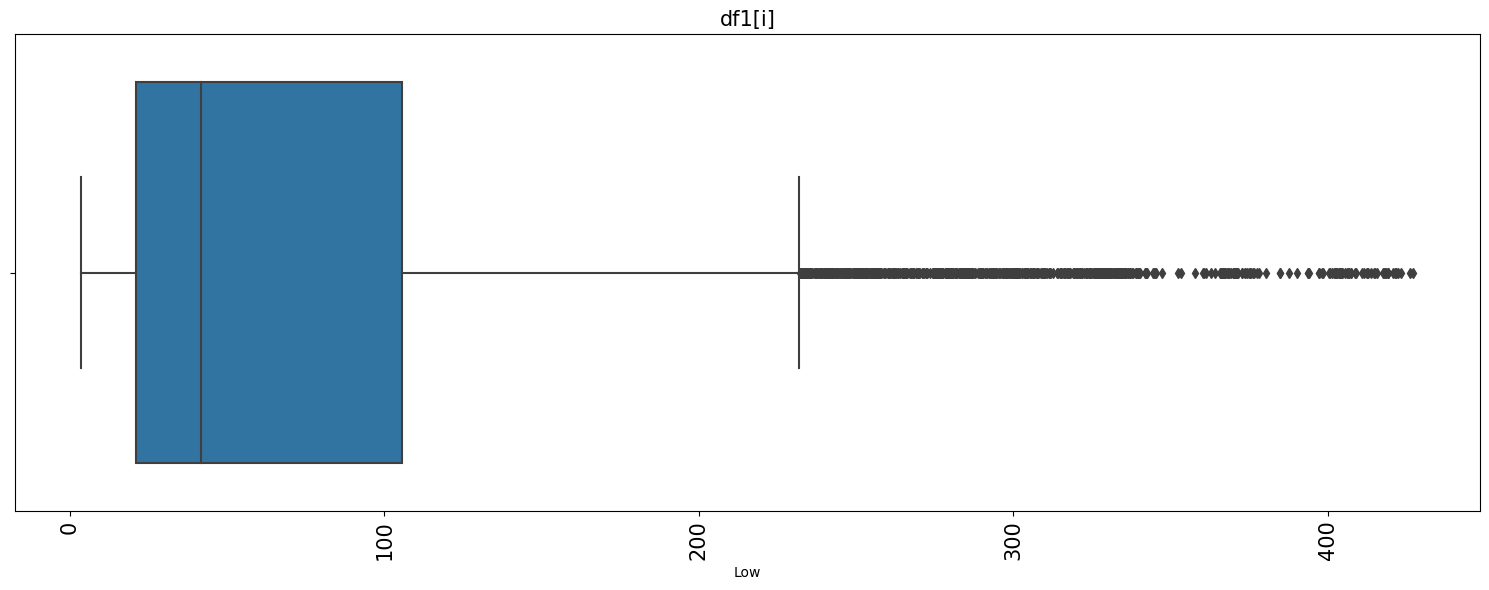

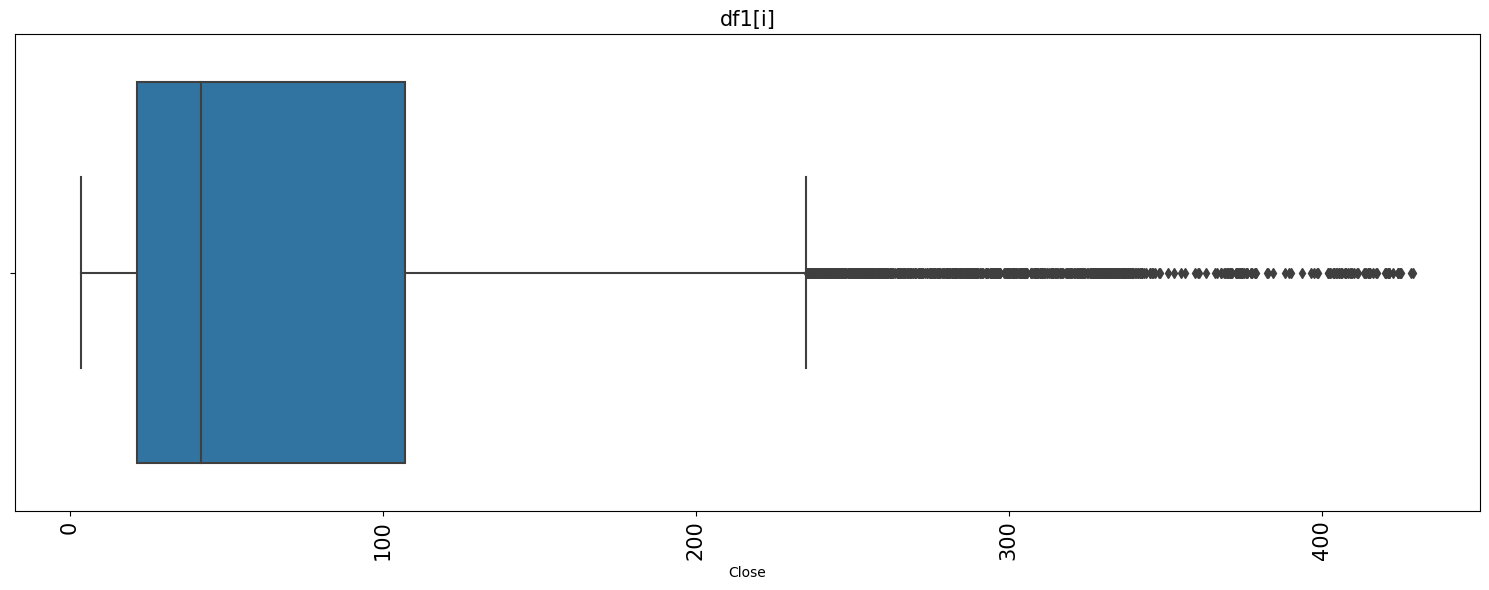

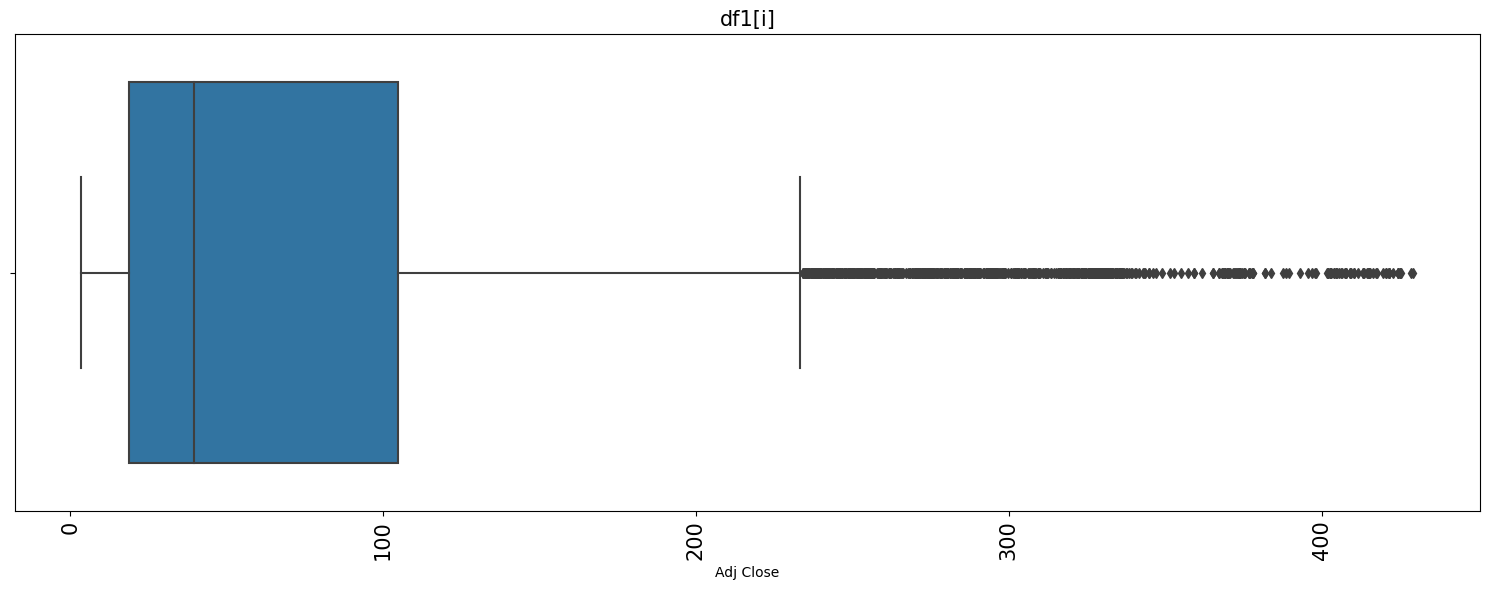

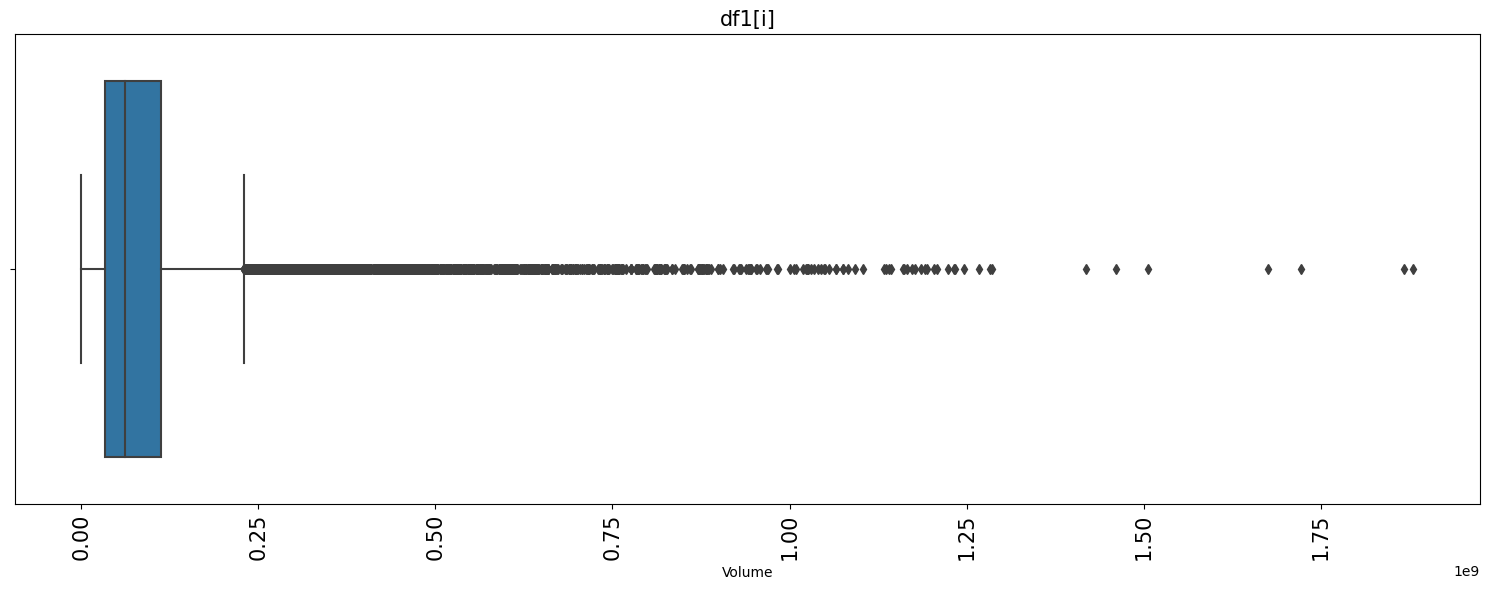

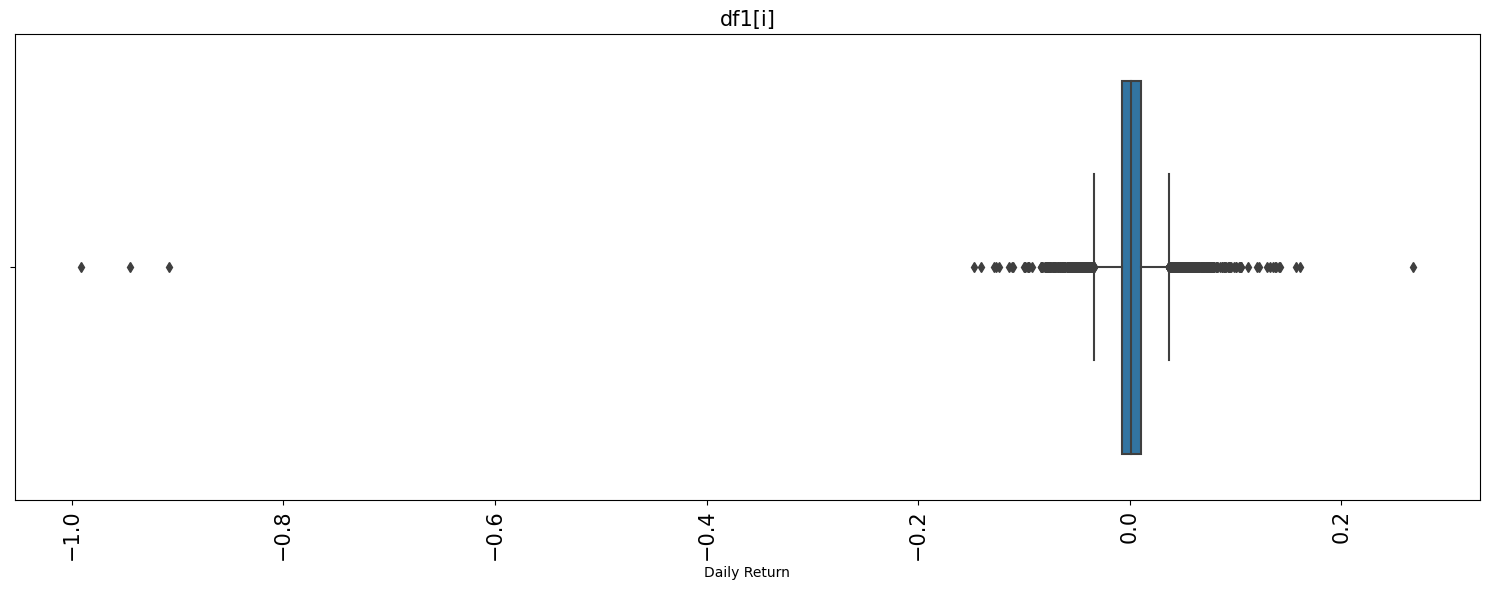

In [56]:


for i in df1.select_dtypes(include=np.number):
    sns.boxplot(df1[i])
    plt.title('df1[i]', fontsize=15)
    plt.xticks(rotation = 'vertical', fontsize = 15)
    plt.tight_layout()
    plt.show()

Inference:

    There is presence of Outliers on all the Variables ,The existence of outliers in price-related variables (Open, High, Low, Close, Adj-Close) suggests the occurrence of exceptional and uncommon price movements.

    The Stocks Volume has more number of potential outliers compared to all other variables  Large trading volumes could be associated with significant news, earnings releases, or other events that attract a surge in market participation.

    High numbers of negative outliers in daily returns suggest higher volatility and risk in the investment. It indicates that there are days when the returns experience extreme negative movements, which can lead to significant losses for investors.

In [57]:
q1 =df1.quantile(0.25)
q3= df1.quantile(0.75)
iqr=q3-q1

upper_limit= q3+1.5*iqr
lower_limit= q1-1.5*iqr

In [58]:
ou=df1.drop('Date',axis=1)

In [59]:
outliers=ou[((ou < (lower_limit)) | (ou> (upper_limit))).any(axis=1)]
outliers.shape

(2906, 8)

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15096 entries, 0 to 15095
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Open          15096 non-null  float64       
 1   High          15096 non-null  float64       
 2   Low           15096 non-null  float64       
 3   Close         15096 non-null  float64       
 4   Adj Close     15096 non-null  float64       
 5   Volume        15096 non-null  float64       
 6   Daily Return  15096 non-null  float64       
 7   Company       15096 non-null  object        
 8   Date          15096 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 1.0+ MB


Inference:

    There are totally 2907 outliers so we are not going to remove it as it will be a loss of data 

**Check for presence of Insignificant Variables from Model Perspective**

In [61]:
df1.std()

Open                               74.604118
High                               75.369506
Low                                73.824849
Close                              74.630452
Adj Close                          74.328238
Volume                      145863724.158261
Daily Return                        0.022569
Date            1581 days 02:10:50.092164848
dtype: object

Inference:

    All the variable shows Contribution there is no variable that can be removed from the dataset

STATISTICAL ANALYSIS

In [62]:
from scipy.stats import shapiro,levene

In [63]:
#assumeing the Condfidence level is 95% significance level is 0.05%
from scipy.stats import shapiro
#Ho:Data is Normal Distributed
#H1:Data is not normally Distributed

for column in df1.columns:
    
    if df1[column].dtype in ['int64', 'float64']:
        stat, p_value = shapiro(df1[column])
        print(f"Shapiro-Wilk test for {column}: Statistic={stat:.4f}, p-value={p_value:.10f}")
    else:
        print(f"Skipped Shapiro-Wilk test for {column}: Non-numeric data")


Shapiro-Wilk test for Open: Statistic=0.7922, p-value=0.0000000000
Shapiro-Wilk test for High: Statistic=0.7925, p-value=0.0000000000
Shapiro-Wilk test for Low: Statistic=0.7921, p-value=0.0000000000
Shapiro-Wilk test for Close: Statistic=0.7923, p-value=0.0000000000
Shapiro-Wilk test for Adj Close: Statistic=0.7886, p-value=0.0000000000
Shapiro-Wilk test for Volume: Statistic=0.5832, p-value=0.0000000000
Shapiro-Wilk test for Daily Return: Statistic=0.6482, p-value=0.0000000000
Skipped Shapiro-Wilk test for Company: Non-numeric data
Skipped Shapiro-Wilk test for Date: Non-numeric data


Conclusion:
    
    We Reject Null hypothesis since the p_value is lesser than the significance level and conclude that Data is not Normally Distributed

In [64]:

from itertools import combinations
#Ho:Data is of equal variance
#H1:Data is not of equal variance
combinations_of_vars = combinations(df1.columns, 2)

for variable1, variable2 in combinations_of_vars:
    # Check if the columns contain numeric data
    if df1[variable1].dtype in ['int64', 'float64'] and df1[variable2].dtype in ['int64', 'float64']:
        stat, p_value = levene(df1[variable1], df1[variable2])
        print(f"Levene test for {variable1} and {variable2}: Statistic={stat:.4f}, p-value={p_value:.4f}")
    else:
        print(f"Skipped Levene test for {variable1} and {variable2}: Non-numeric data")


Levene test for Open and High: Statistic=0.6151, p-value=0.4329
Levene test for Open and Low: Statistic=0.6162, p-value=0.4325
Levene test for Open and Close: Statistic=0.0011, p-value=0.9734
Levene test for Open and Adj Close: Statistic=0.0129, p-value=0.9095
Levene test for Open and Volume: Statistic=4498.2197, p-value=0.0000
Levene test for Open and Daily Return: Statistic=10190.7465, p-value=0.0000
Skipped Levene test for Open and Company: Non-numeric data
Skipped Levene test for Open and Date: Non-numeric data
Levene test for High and Low: Statistic=2.4631, p-value=0.1166
Levene test for High and Close: Statistic=0.5642, p-value=0.4526
Levene test for High and Adj Close: Statistic=0.8054, p-value=0.3695
Levene test for High and Volume: Statistic=4498.2196, p-value=0.0000
Levene test for High and Daily Return: Statistic=10201.0480, p-value=0.0000
Skipped Levene test for High and Company: Non-numeric data
Skipped Levene test for High and Date: Non-numeric data
Levene test for Low an

Conclusion:
    
    For the pairs of numerical columns that have a p-value greater than 0.05 (e.g., Open and High, High and Low, Low and Close, etc.), we fail to reject the null hypothesis and conclude that the data is of equal variance

    For the pairs of numerical columns that have a p-value less than or equal to 0.05 (e.g., Open and Volume, Open and Daily Return, High and Volume, etc.), we reject the null hypothesis. This suggests that these pairs of columns have significantly different variances.

### THOUGH HOW-EVER SOME VARIABLES IS OF EQUAL  VARIANCE, THE DATA IS NOT NORMAL AS THE SHAPIRO TEST IS FAILED SO THE PARAMETRIC ASSUMPTIONS ARE NOT SATISIFIED

In [65]:
from scipy.stats import mannwhitneyu ,wilcoxon, kruskal, friedmanchisquare

#checking is there a difference bitween two independent groups
# Assuming the confidence interval is 95%
variable_names = ['Open', 'High', 'Low', 'Close', 'Volume','Daily Return']

# Iterate through all pairs of variables
for var1, var2 in combinations(variable_names, 2):
    group1 = df1[var1]
    group2 = df1[var2]

    # Null hypothesis: The distributions of the two variables are equal
    # Alternative hypothesis: The distributions are not equal
    statistic, p_value = mannwhitneyu(group1, group2)
    print(f"Mann-Whitney U test for {var1} and {var2}: U = {statistic}, p-value = {p_value}")


Mann-Whitney U test for Open and High: U = 113263226.5, p-value = 0.3682050427831396
Mann-Whitney U test for Open and Low: U = 114653296.0, p-value = 0.3493236470428268
Mann-Whitney U test for Open and Close: U = 113931205.0, p-value = 0.9858785658447786
Mann-Whitney U test for Open and Volume: U = 0.0, p-value = 0.0
Mann-Whitney U test for Open and Daily Return: U = 227889216.0, p-value = 0.0
Mann-Whitney U test for High and Low: U = 115321827.0, p-value = 0.06894609962144702
Mann-Whitney U test for High and Close: U = 114614094.5, p-value = 0.3766249683959543
Mann-Whitney U test for High and Volume: U = 0.0, p-value = 0.0
Mann-Whitney U test for High and Daily Return: U = 227889216.0, p-value = 0.0
Mann-Whitney U test for Low and Close: U = 113221752.0, p-value = 0.3397737203686537
Mann-Whitney U test for Low and Volume: U = 0.0, p-value = 0.0
Mann-Whitney U test for Low and Daily Return: U = 227889216.0, p-value = 0.0
Mann-Whitney U test for Close and Volume: U = 0.0, p-value = 0.0


Conclusion:
    
    For pairs like Open and High, Open and Low, High and Low, etc., where the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that The distributions of the two variables are equal

    For pairs like Open and Volume, Open and Daily Return, High and Volume, etc., where the p-value is less than 0.05, we reject the null hypothesis. This indicates that the distributions of these variables are significantly different.

    It's important to note that for pairs involving Volume and Daily Return, the p-values are 0.0. This suggests that there is a significant difference between the distributions of these variables.

In [66]:

# Assuming the confidence interval is 95%

variable_names = ['Open', 'High', 'Low', 'Close', 'Volume','Daily Return']

for vars_combination in combinations(variable_names, 2):
    
    group1 = df1[vars_combination[0]]
    group2 = df1[vars_combination[1]]

    # Null hypothesis: The distribution of differences is symmetric around zero
    # Alternative hypothesis: The distribution of differences is not symmetric around zero
    statistic, p_value = wilcoxon(group1 - group2)
    print(f"Wilcoxon signed-rank test for {vars_combination}: W = {statistic}, p-value = {p_value}")

Wilcoxon signed-rank test for ('Open', 'High'): W = 0.0, p-value = 0.0
Wilcoxon signed-rank test for ('Open', 'Low'): W = 0.0, p-value = 0.0
Wilcoxon signed-rank test for ('Open', 'Close'): W = 54002953.0, p-value = 1.02562036874816e-06
Wilcoxon signed-rank test for ('Open', 'Volume'): W = 0.0, p-value = 0.0
Wilcoxon signed-rank test for ('Open', 'Daily Return'): W = 0.0, p-value = 0.0
Wilcoxon signed-rank test for ('High', 'Low'): W = 0.0, p-value = 0.0
Wilcoxon signed-rank test for ('High', 'Close'): W = 0.0, p-value = 0.0
Wilcoxon signed-rank test for ('High', 'Volume'): W = 0.0, p-value = 0.0
Wilcoxon signed-rank test for ('High', 'Daily Return'): W = 0.0, p-value = 0.0
Wilcoxon signed-rank test for ('Low', 'Close'): W = 0.0, p-value = 0.0
Wilcoxon signed-rank test for ('Low', 'Volume'): W = 0.0, p-value = 0.0
Wilcoxon signed-rank test for ('Low', 'Daily Return'): W = 0.0, p-value = 0.0
Wilcoxon signed-rank test for ('Close', 'Volume'): W = 0.0, p-value = 0.0
Wilcoxon signed-rank t

Conclusion: 

    For all pairs of variables, the p-value is 0.0,so we rejct null hypothesis and conclude that he distribution of differences is not symmetric around zero

    Except for open and close we fail to reject null hypothesis and conclude The distribution of differences is symmetric around zero


In [67]:

# Assuming the confidence interval is 95%
variable_names = ['Open', 'High', 'Low', 'Close', 'Volume','Daily Return']

# Iterate through all combinations of variables
for vars_combination in combinations(variable_names, 3):
    # Extract the variables for the Kruskal-Wallis test
    groups = [df1[var] for var in vars_combination]

    # Null hypothesis: The medians of all groups are equal
    # Alternative hypothesis: At least one group has a different median
    statistic, p_value = kruskal(*groups)
    print(f"Kruskal-Wallis test for {vars_combination}: H = {statistic}, p-value = {p_value}")


Kruskal-Wallis test for ('Open', 'High', 'Low'): H = 3.3290161706696346, p-value = 0.18928374653509403
Kruskal-Wallis test for ('Open', 'High', 'Close'): H = 1.061156345222503, p-value = 0.588264752767568
Kruskal-Wallis test for ('Open', 'High', 'Volume'): H = 30191.693252427158, p-value = 0.0
Kruskal-Wallis test for ('Open', 'High', 'Daily Return'): H = 30191.69325183038, p-value = 0.0
Kruskal-Wallis test for ('Open', 'Low', 'Close'): H = 1.191688443162948, p-value = 0.5510971213429913
Kruskal-Wallis test for ('Open', 'Low', 'Volume'): H = 30191.722674279907, p-value = 0.0
Kruskal-Wallis test for ('Open', 'Low', 'Daily Return'): H = 30191.722673683133, p-value = 0.0
Kruskal-Wallis test for ('Open', 'Close', 'Volume'): H = 30191.333512202273, p-value = 0.0
Kruskal-Wallis test for ('Open', 'Close', 'Daily Return'): H = 30191.333511605502, p-value = 0.0
Kruskal-Wallis test for ('Open', 'Volume', 'Daily Return'): H = 40255.11113859883, p-value = 0.0
Kruskal-Wallis test for ('High', 'Low',

Conclusion: 

    For the combinations ('Open', 'High', 'Low'),('Open', 'High', 'Close'),('Open', 'Low', 'Close') ,and ('High', 'Low', 'Close'), the p-value is greater than 0.05, indicating no significant difference between the distributions of the groups. Therefore, we fail to reject the null hypothesis, suggesting that the medians of these groups are not significantly different.

     the rest of all the p-value is less than 0.05, suggesting significant differences between the distributions of the groups. Thus, we reject the null hypothesis, implying that at least one group has a different median compared to the others.

In [68]:

# Assuming the confidence interval is 95%
variable_names = ['Open', 'High', 'Low', 'Close', 'Volume','Daily Return']

# Iterate through all combinations of variables
for vars_combination in combinations(variable_names, 3):
    # Extract the variables for the Friedman test
    groups = [df1[var] for var in vars_combination]

    # Null hypothesis: The medians of all groups are equal
    # Alternative hypothesis: At least one group has a different median
    statistic, p_value = friedmanchisquare(*groups)
    print(f"Friedman test for {vars_combination}: Chi-square = {statistic}, p-value = {p_value}")


Friedman test for ('Open', 'High', 'Low'): Chi-square = 29975.012110091764, p-value = 0.0
Friedman test for ('Open', 'High', 'Close'): Chi-square = 22274.657942117923, p-value = 0.0
Friedman test for ('Open', 'High', 'Volume'): Chi-square = 30090.057761972836, p-value = 0.0
Friedman test for ('Open', 'High', 'Daily Return'): Chi-square = 30090.057761972836, p-value = 0.0
Friedman test for ('Open', 'Low', 'Close'): Chi-square = 22335.456217206636, p-value = 0.0
Friedman test for ('Open', 'Low', 'Volume'): Chi-square = 30079.29622980254, p-value = 0.0
Friedman test for ('Open', 'Low', 'Daily Return'): Chi-square = 30079.29622980254, p-value = 0.0
Friedman test for ('Open', 'Close', 'Volume'): Chi-square = 22669.868998093985, p-value = 0.0
Friedman test for ('Open', 'Close', 'Daily Return'): Chi-square = 22669.868998093985, p-value = 0.0
Friedman test for ('Open', 'Volume', 'Daily Return'): Chi-square = 30192.0, p-value = 0.0
Friedman test for ('High', 'Low', 'Close'): Chi-square = 30083.

Conclusion:

    Since p_value is lesser trhgan the significance level we reject null hypothesis and conclude that At least one group has a different median

Encoding

In [69]:
le=LabelEncoder()

In [70]:
for i in cat:
    cat[i]=le.fit_transform(cat[i])
cat.head()    

,Company,Date
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4


In [71]:
num.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
0,4.286071,4.320714,4.250000,4.293571,3.634936,389236400.000000,-0.003423
1,4.270357,4.291786,4.187500,4.225357,3.577186,454622000.000000,-0.015887
2,4.185714,4.223214,4.134286,4.201429,3.556927,412882400.000000,-0.005663
3,4.256786,4.398214,4.242500,4.337500,3.672126,593446000.000000,0.032387
4,4.327857,4.437500,4.294643,4.407857,3.731690,497495600.000000,0.016221


In [72]:
df1=pd.concat([cat,num],axis=1)

Train Test Split

In [73]:
x=df1.drop('Daily Return',axis=1)
y=df1['Daily Return']

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)


In [75]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

print("X_train shape:", xtrain.shape)
print("X_test shape:", xtest.shape)
print("y_train shape:", ytrain.shape)
print("y_test shape:", ytest.shape)

X_train shape: (12076, 8)
X_test shape: (3020, 8)
y_train shape: (12076,)
y_test shape: (3020,)


In [76]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,SGDRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import statsmodels.api as sna

In [77]:
lr=LinearRegression()
lr=lr.fit(xtrain,ytrain)
ypred_lr_1=lr.predict(xtest)
ypred_lr_train=lr.predict(xtrain)
print('The R2 score test:',r2_score(ytest,ypred_lr_1))
print('The R2 score train:',r2_score(ytrain,ypred_lr_train))
print('The RMSE score test:',np.sqrt(mean_squared_error(ytest,ypred_lr_1)))
print('The RMSE score train:',np.sqrt(mean_squared_error(ytrain,ypred_lr_train)))

The R2 score test: 0.17332754969994912
The R2 score train: 0.2129571215156033
The RMSE score test: 0.022675443196058978
The RMSE score train: 0.01945976082720913


In [78]:
r=Ridge()
r=r.fit(xtrain,ytrain)
ypred_r_1=r.predict(xtest)
ypred_r_train=r.predict(xtrain)
print('The R2 score test:',r2_score(ytest,ypred_r_1))

print('The RMSE score test:',np.sqrt(mean_squared_error(ytest,ypred_r_1)))


The R2 score test: 0.17332817123770938
The RMSE score test: 0.022675434671735457


In [79]:
l=Lasso()
l=l.fit(xtrain,ytrain)
ypred_l_1=l.predict(xtest)
ypred_l_train=l.predict(xtrain)
print('The R2 score test:',r2_score(ytest,ypred_l_1))
print('The RMSE score test:',np.sqrt(mean_squared_error(ytest,ypred_l_1)))


The R2 score test: 9.781575748490923e-06
The RMSE score test: 0.024939453231919075


In [80]:
el=ElasticNet()
el=el.fit(xtrain,ytrain)
ypred_el_1=el.predict(xtest)
ypred_el_train=el.predict(xtrain)
print('The R2 score test:',r2_score(ytest,ypred_el_1))
print('The RMSE score test:',np.sqrt(mean_squared_error(ytest,ypred_el_1)))


The R2 score test: 9.782779658351615e-06
The RMSE score test: 0.024939453216906503


In [81]:
rf=RandomForestRegressor()
rf=rf.fit(xtrain,ytrain)
ypred_rf_1=rf.predict(xtest)
ypred_rf_train=rf.predict(xtrain)
print('The R2 score test:',r2_score(ytest,ypred_rf_1))

print('The RMSE score test:',np.sqrt(mean_squared_error(ytest,ypred_rf_1)))


The R2 score test: 0.5743980923001927
The RMSE score test: 0.01627012295219525


In [82]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb=xgb.fit(xtrain,ytrain)
ypred_xgb_1=xgb.predict(xtest)
ypred_xgb_train=xgb.predict(xtrain)
print('The R2 score test:',r2_score(ytest,ypred_xgb_1))

print('The RMSE score test:',np.sqrt(mean_squared_error(ytest,ypred_xgb_1)))


The R2 score test: 0.12223499778547542
The RMSE score test: 0.02336566696642493


In [83]:
params = [{"criterion":["gini","entropy"],"max_depth":[10,15],"max_features":["sqrt","log2"],"min_samples_split":[2,8],"min_samples_leaf":[5,9],"max_leaf_nodes":[8,11]}]

In [84]:
params = {
    'n_estimators': [100,150],
    'max_depth': [10, 15],
    "max_features":["sqrt","log2"],
    'min_samples_split': [2, 8],
    'min_samples_leaf': [5, 9],
    "max_leaf_nodes":[8,11]
}

grids = GridSearchCV(rf, params, scoring="neg_mean_squared_error", cv=2)
grids.fit(xtrain, ytrain)

best_params = grids.best_params_
best_score = grids.best_score_

print("Best Parameters:", best_params)
print("Best Score (Negative MSE):", best_score)

Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 11, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 150}
Best Score (Negative MSE): -0.00047445421701154515


In [85]:
rf=RandomForestRegressor(max_depth= 10, max_features='sqrt', max_leaf_nodes= 11,min_samples_leaf= 5, min_samples_split=2 , n_estimators= 100)
rf=rf.fit(xtrain,ytrain)
ypred_rf_1=rf.predict(xtest)
ypred_rf_train=rf.predict(xtrain)
print('The R2 score test:',r2_score(ytest,ypred_rf_1))

print('The RMSE score test:',np.sqrt(mean_squared_error(ytest,ypred_rf_1)))


The R2 score test: 0.10911338121305403
The RMSE score test: 0.023539664558018834


In [86]:
gb=GradientBoostingRegressor()
gb=gb.fit(xtrain,ytrain)
ypred_gb_1=gb.predict(xtest)
ypred_gb_train=gb.predict(xtrain)
print('The R2 score test:',r2_score(ytest,ypred_gb_1))

print('The RMSE score test:',np.sqrt(mean_squared_error(ytest,ypred_gb_1)))


The R2 score test: 0.4691198002004616
The RMSE score test: 0.018171355119410516


In [87]:
dt=DecisionTreeRegressor()
dt=dt.fit(xtrain,ytrain)
ypred_dt_1=dt.predict(xtest)
ypred_dt_train=dt.predict(xtrain)
print('The R2 score test:',r2_score(ytest,ypred_dt_1))

print('The RMSE score test:',np.sqrt(mean_squared_error(ytest,ypred_dt_1)))


The R2 score test: 0.18702202750984598
The RMSE score test: 0.022486840591901855


In [88]:
sr=SGDRegressor()
sr=sr.fit(xtrain,ytrain)
sr_pred=sr.predict(xtest)
print('RMSE_sr_',np.sqrt(mean_squared_error(ytest,sr_pred)))
print('R2_score',r2_score(ytest,sr_pred))

RMSE_sr_ 9.330606996301825e+23
R2_score -1.3997216852636797e+51


In [89]:
import stat
temp_x = sna.add_constant(xtrain)

temp_x = temp_x.reindex(ytrain.index)

model = sna.OLS(ytrain, temp_x).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Daily Return   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     408.1
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:48:54   Log-Likelihood:                 30437.
No. Observations:               12076   AIC:                        -6.086e+04
Df Residuals:                   12067   BIC:                        -6.079e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.001      1.016      0.3

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['variables']=xtrain.columns
vif['VIF']=[variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,variables,VIF
3,High,31080.068739
4,Low,29476.486316
5,Close,29407.412494
2,Open,27755.778353
6,Adj Close,3774.477909
1,Date,6.028637
0,Company,4.483601
7,Volume,1.270122


In [91]:
x=df1.drop(['Daily Return','High'],axis=1)
y=df1['Daily Return']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)
x_c=sna.add_constant(xtrain)
model=sna.OLS(ytrain,x_c)
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Daily Return   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     510.8
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:48:54   Log-Likelihood:                 27799.
No. Observations:               10567   AIC:                        -5.558e+04
Df Residuals:                   10559   BIC:                        -5.552e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0022      0.001      3.745      0.000       0.001       0.003
Company       -0.0005      0.000     -2.237      0.025      -0.001   -6.18e-05
Date       -5.964e-07   2.89e-07     -2.062      0.039   -1.16e-06   -2.95e-08
Open          -0.0065      0.000    -37.859      0.000      -0.007      -0.006
Low           -0.0005      0.000     -1.911      0.056      -0.001    1.26e-05
Close          0.0070      0.000     36.065      0.000       0.007       0.007
Adj Close  -2.774e-06      0.000     -0.028      0.978      -0.000       0.000
Volume     -8.686e-15   1.36e-12     -0.006      0.995   -2.68e-12    2.66e-12
==============================================================================
Omnibus:                    19439.540   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        220463523.535
Skew:                         -12.801   Prob(JB):                         0.00
Kurtosis:                     710.154   Cond. No.                     6.46e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.46e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['variables']=xtrain.columns
vif['VIF']=[variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,variables,VIF
3,Low,24505.459395
4,Close,14221.602668
2,Open,11122.658734
5,Adj Close,3714.024127
1,Date,6.045002
0,Company,4.531030
6,Volume,1.267020


In [93]:
x=df1.drop(['Daily Return','High','Low'],axis=1)
y=df1['Daily Return']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)
x_c=sna.add_constant(xtrain)
model=sna.OLS(ytrain,x_c)
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Daily Return   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     595.2
Date:                Tue, 09 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:48:54   Log-Likelihood:                 27797.
No. Observations:               10567   AIC:                        -5.558e+04
Df Residuals:                   10560   BIC:                        -5.553e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0022      0.001      3.631      0.000       0.001       0.003
Company       -0.0005      0.000     -2.313      0.021      -0.001   -7.86e-05
Date       -5.509e-07   2.88e-07     -1.911      0.056   -1.12e-06    1.41e-08
Open          -0.0067      0.000    -59.653      0.000      -0.007      -0.007
Close          0.0068      0.000     45.066      0.000       0.006       0.007
Adj Close   -8.49e-06      0.000     -0.085      0.933      -0.000       0.000
Volume       2.38e-13   1.36e-12      0.176      0.861   -2.42e-12     2.9e-12
==============================================================================
Omnibus:                    19415.160   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        219940614.264
Skew:                         -12.763   Prob(JB):                         0.00
Kurtosis:                     709.316   Cond. No.                     6.45e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['variables']=xtrain.columns
vif['VIF']=[variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,variables,VIF
3,Close,8519.931171
2,Open,4836.909692
4,Adj Close,3710.887995
1,Date,6.028166
0,Company,4.500411
5,Volume,1.260648


In [95]:
#since we have very less variables dropping of the insignificant variables will be a loss of data so we are  not going to drop

In [96]:
x=df1.drop('Daily Return',axis=1)
y=df1['Daily Return']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)


In [97]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

In [98]:
kf=KFold(n_splits=6,shuffle=True,random_state=1)
lr=LinearRegression()
prediction_ml=[]
rmse_kf=[]
for  train_index ,test_index in kf.split(xtrain):
    kf_xtrain=xtrain.iloc[train_index]
    kf_xtest=xtrain.iloc[test_index]
    kf_ytrain=ytrain.iloc[train_index]
    kf_ytest=ytrain.iloc[test_index]
    prediction_ml.append(lr.fit(kf_xtrain,kf_ytrain).predict(kf_xtest))

In [100]:
kfold=lr.fit(kf_xtrain,kf_ytrain)
pred=kfold.predict(kf_xtest)                                                                          
np.sqrt(mean_squared_error(kf_ytest,pred))
r2_score(kf_ytest,pred)

0.31805400332006706

In [102]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compileing the model
model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(xtrain, ytrain, batch_size=1, epochs=1)


12076/12076 ━━━━━━━━━━━━━━━━━━━━ 124s 10ms/step - loss: 0.0013


In [103]:

train_loss = model.evaluate(xtrain, ytrain, verbose=0)
test_loss = model.evaluate(xtest, ytest, verbose=0)

print(f"Train Loss: {train_loss}")
print(f"Test Loss: {test_loss}")


train_predictions = model.predict(xtrain)
test_predictions = model.predict(xtest)


Train Loss: 0.0006446240586228669
Test Loss: 0.000779672060161829
378/378 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

train_predictions = model.predict(xtrain)
test_predictions = model.predict(xtest)


train_mse = mean_squared_error(ytrain, train_predictions)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(ytrain, train_predictions)
train_r2 = r2_score(ytrain, train_predictions)


test_mse = mean_squared_error(ytest, test_predictions)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(ytest, test_predictions)
test_r2 = r2_score(ytest, test_predictions)


print("Training MSE:", train_mse)
print("Training RMSE:", train_rmse)
print("Training MAE:", train_mae)
print("Training R-squared:", train_r2)
print("Testing MSE:", test_mse)
print("Testing RMSE:", test_rmse)
print("Testing MAE:", test_mae)
print("Testing R-squared:", test_r2)


378/378 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Training MSE: 0.0006427049919731298
Training RMSE: 0.025351627008401843
Training MAE: 0.017109507260979654
Training R-squared: -0.33578041095881606
Testing MSE: 0.0007826870654782822
Testing RMSE: 0.027976544916738417
Testing MAE: 0.017357645702684305
Testing R-squared: -0.2583749171009342


Training Set:

    The model's average error in predicting stock returns is around 0.00049 squared units. This error is small, indicating good performance.

    On average, the model's predictions are about 0.0221 units away from the actual returns.

    The average difference between predicted and actual returns is about 0.0128 units.

    The model explains very little of the variance in the training data.
Testing Set:

    The model's average error in predicting stock returns is slightly higher on the testing set, around 0.00062 squared units.

    On average, the model's predictions are about 0.0249 units away from the actual returns on the testing set.

    The average difference between predicted and actual returns is about 0.0129 units on the testing set.

    Similar to the training set, the model explains very little of the variance in the testing data.

378/378 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


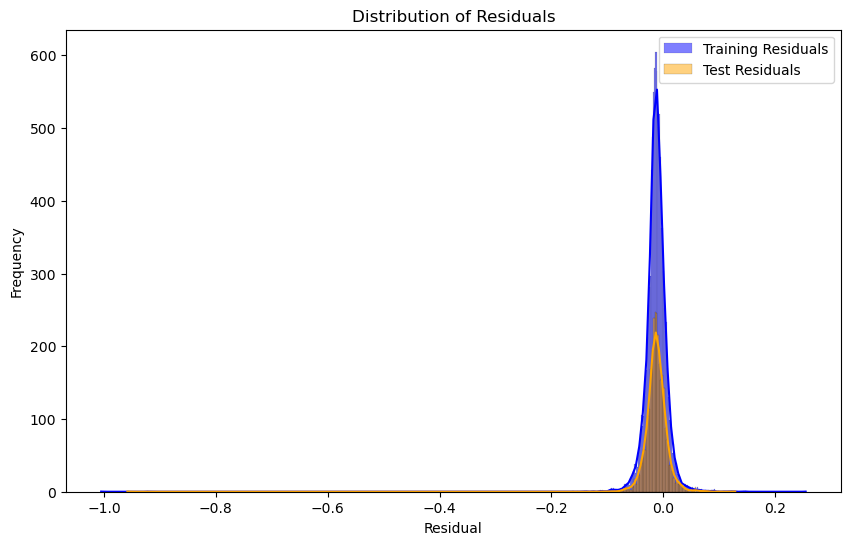

In [105]:
# Calculate residuals
train_predictions = model.predict(xtrain)
test_predictions = model.predict(xtest)
train_residuals = ytrain - train_predictions.flatten()
test_residuals = ytest - test_predictions.flatten()

# Plot distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(train_residuals, kde=True, color='blue', label='Training Residuals', alpha=0.5)
sns.histplot(test_residuals, kde=True, color='orange', label='Test Residuals', alpha=0.5)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.legend()
plt.show()


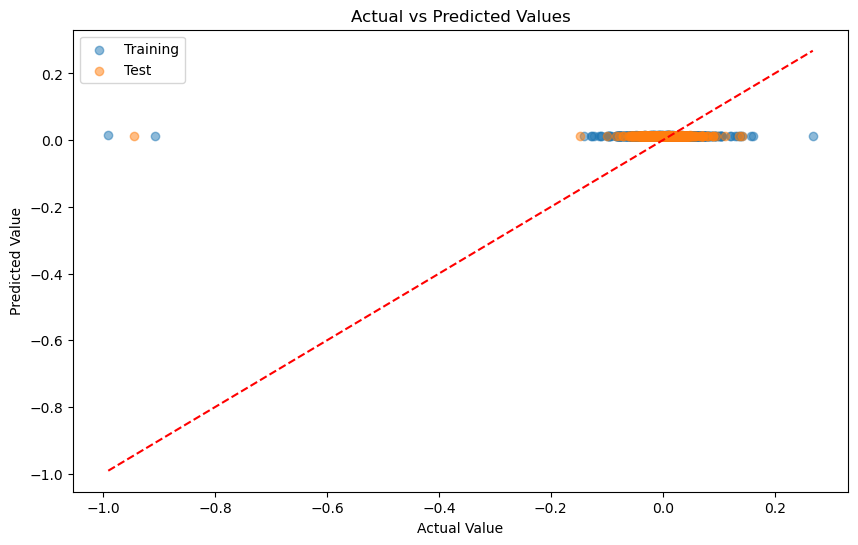

In [106]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(ytrain, train_predictions, label='Training', alpha=0.5)
plt.scatter(ytest, test_predictions, label='Test', alpha=0.5)
plt.plot([min(ytrain.min(), ytest.min()), max(ytrain.max(), ytest.max())], 
         [min(ytrain.min(), ytest.min()), max(ytrain.max(), ytest.max())], 
         color='red', linestyle='--')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


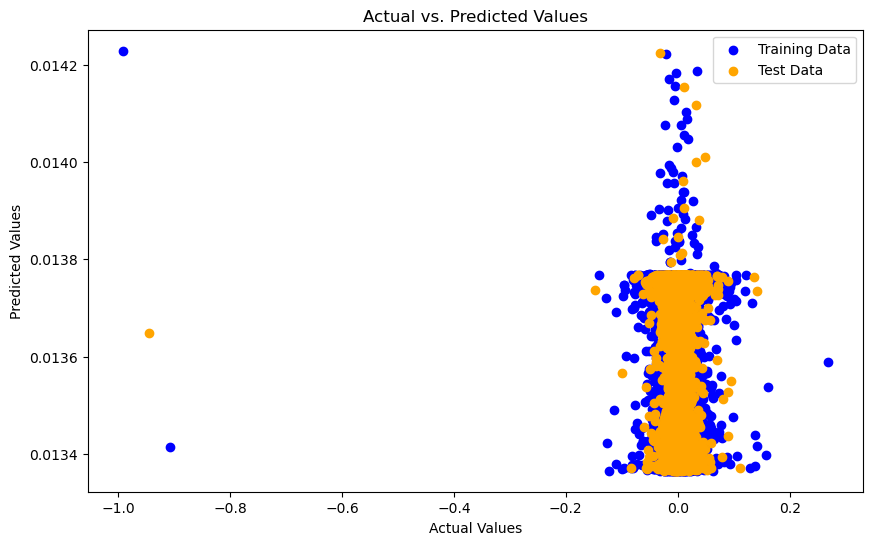

In [107]:
plt.figure(figsize=(10, 6))
plt.scatter(ytrain, train_predictions, color='blue', label='Training Data')
plt.scatter(ytest, test_predictions, color='orange', label='Test Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


The model's performance on the training set and testing set is quite similar, indicating that it's not overfitting or underfitting.

The mean squared error (MSE) on both the training and testing sets is relatively low, suggesting that the model's predictions are close to the actual values.

However, the R-squared values for both training and testing sets are close to zero, indicating that the model explains very little of the variance in the data. This suggests that the model may not capture all the underlying patterns in the data.

In summary, the model appears to be a good fit in terms of generalization to unseen data, but it may not fully capture all the complexities of the stock market data.

BUSINESS INTERPERTATION :
    
    The model seems to be doing a decent job at predicting stock market returns, but it's not perfect. 

    It's like having a tool that gives you a rough idea of what might happen in the market, but it doesn't capture everything.

    So, while it can be helpful, it's important to not rely solely on this model for making investment decisions.

    Keep an eye on how well it performs over time and use it alongside other strategies and information for better results.